
Un notebook de Jupyter, al que llamaremos exploratory_analysis.ipynb. Este notebook se deben cargar los datos, realizar un análisis exploratorio exhaustivo intentando sacar la mayor parte de información posible de los mismos y luego se deben probar con los datos todas las técnicas y modelos que apliquen a la resolución del problema vistos durante el módulo 3 (machine learning). Se debe comparar el rendimiento de cada técnica que esté orientada al mismo propósito y mediante este procedimiento elegir las que finalmente se industrializarán dentro del paquete models. Asimismo, no solo se deben comparar técnica a técnica, sino que una vez elegida una de ellas, se tienen que intentar encontrar los hiperparámetros óptimos y las transformaciones de los datos de entrada más adecuadas para obtener los mejores resultados.

Ahora vamos a hablar sobre el dataset utilizado y los problemas de negocio que queremos resolver.
El dataset incluye varios meses de datos sobre los videos de tendencias diarias de YouTube.
Los datos también incluyen un campo category_id, que varía entre regiones. 
Para recuperar las categorías de un video específico, hay que buscarlo en el JSON asociado. 
Se incluye uno de esos archivos para cada una de las regiones del conjunto de datos. 
El primer paso del pre-procesamiento deberá ser cruzar ambos archivos para cada región y sustituir los IDs en los CSV por las etiquetas que correspondan.
Después, se deben juntar todos los datos enriquecidos en el paso anterior de todas las regiones en un solo CSV que incluya
una nueva columna con el nombre de la región. Toda esta lógica deberá implementarse en preprocess_data.py.
Se deberán probar todos los modelos posibles para cada uno de los siguientes problemas de negocio, 
industrializando en el paquete solamente el mejor de ellos para cada uno de los casos, con los mejores hiperparámetros y transformaciones previas 
encontradas.


In [4]:
#ImportamoS LAS LIBRERIAS  necesarias para el exploratory data análisis.EDA.
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

PREPARAMOS LOS ARCHIVOS .CSV Y .JSON PARA CREAR UN ÚNICO DATA FRAME PARA USAR EN LA PRACTICA.

In [4]:
 #CARGAMOS LOS DATOS DEL DATA FRAME EN CSV PARA VISUALIZAR

CAvideos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/CAvideos.csv')
CAvideos



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


In [5]:
CAvideos_json = json.load(open('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/Ca_category_id.json'))

In [6]:
CAvideos_json

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [7]:
CAvideos_json['items'][0].keys()

dict_keys(['kind', 'etag', 'id', 'snippet'])

In [8]:
CAvideos_json['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [9]:
CAvideos_json['items'][0]['snippet']['title']

'Film & Animation'

In [10]:
for category in CAvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    print(title, ":", cat_id)

Film & Animation : 1
Autos & Vehicles : 2
Music : 10
Pets & Animals : 15
Sports : 17
Short Movies : 18
Travel & Events : 19
Gaming : 20
Videoblogging : 21
People & Blogs : 22
Comedy : 23
Entertainment : 24
News & Politics : 25
Howto & Style : 26
Education : 27
Science & Technology : 28
Movies : 30
Anime/Animation : 31
Action/Adventure : 32
Classics : 33
Comedy : 34
Documentary : 35
Drama : 36
Family : 37
Foreign : 38
Horror : 39
Sci-Fi/Fantasy : 40
Thriller : 41
Shorts : 42
Shows : 43
Trailers : 44


In [11]:
ca_eqiv_dict = {}
for category in CAvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    ca_eqiv_dict[cat_id] = title

In [12]:
ca_eqiv_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [13]:
CAvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


In [14]:
CAvideos = CAvideos[CAvideos['category_id'] != 29]

In [15]:
CAvideos['category_id'] = CAvideos['category_id'].apply(lambda x: ca_eqiv_dict[str(x)])
#CAMBIAMOS EL ID NUMERICO POR EL ID NOMINAL DE CATEGORIA

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\1599462066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CAvideos['category_id'] = CAvideos['category_id'].apply(lambda x: ca_eqiv_dict[str(x)])


In [16]:
CAvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,Entertainment,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,Entertainment,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,Gaming,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,News & Politics,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


In [17]:
CAvideos.rename(columns={'category_id' : 'category'}, inplace=True)
#renombramos category_id a Category en el data set

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3093350468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CAvideos.rename(columns={'category_id' : 'category'}, inplace=True)


In [18]:
CAvideos

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,Entertainment,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,Entertainment,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,Gaming,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,News & Politics,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


In [19]:
CAvideos = CAvideos.assign(country='Canada')
CAvideos
#añadimos la columna canada a todas las filas

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Canada
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Canada
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Canada
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Canada
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,Entertainment,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,Canada
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,Entertainment,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...,Canada
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,Gaming,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,Canada
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,News & Politics,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...,Canada


In [20]:
DEvideos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/DEvideos.csv')

In [21]:
DEvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40835,fn5WNxy-Wcw,18.14.06,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,20,2018-06-12T01:54:02.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",1394530,46778,501,9878,https://i.ytimg.com/vi/fn5WNxy-Wcw/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40836,zAFv43lxqHE,18.14.06,YMS: The Visit,YourMovieSucksDOTorg,24,2018-06-13T21:58:43.000Z,[none],139733,11155,119,1968,https://i.ytimg.com/vi/zAFv43lxqHE/default.jpg,False,False,False,Patreon: http://www.patreon.com/YMSTwitch: htt...
40837,zSXG5I6Y2fA,18.14.06,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,24,2018-06-12T10:01:28.000Z,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",26054,364,11,8,https://i.ytimg.com/vi/zSXG5I6Y2fA/default.jpg,False,False,False,Günter versucht sich als Ersthelfer bei einem ...
40838,5d115sePmaU,18.14.06,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,20,2018-06-11T21:16:55.000Z,"Assassin's Creed|""Assassins Creed""|""Assassin's...",1139198,14900,1421,1587,https://i.ytimg.com/vi/5d115sePmaU/default.jpg,False,False,False,"Vom verstoßenen Söldner zum legendären Helden,..."


Hacemos los mismo con los datos de todos los paises del data Frame



In [22]:
DEvideos_json = json.load(open('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/DE_category_id.json'))

In [23]:
DEvideos_json


{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [24]:
DEvideos_json['items'][0].keys()

dict_keys(['kind', 'etag', 'id', 'snippet'])

In [25]:
DEvideos_json['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [26]:
DEvideos_json['items'][0]['snippet']['title']

'Film & Animation'

In [27]:
for category in DEvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    print(title, ":", cat_id)

Film & Animation : 1
Autos & Vehicles : 2
Music : 10
Pets & Animals : 15
Sports : 17
Short Movies : 18
Travel & Events : 19
Gaming : 20
Videoblogging : 21
People & Blogs : 22
Comedy : 23
Entertainment : 24
News & Politics : 25
Howto & Style : 26
Education : 27
Science & Technology : 28
Movies : 30
Anime/Animation : 31
Action/Adventure : 32
Classics : 33
Comedy : 34
Documentary : 35
Drama : 36
Family : 37
Foreign : 38
Horror : 39
Sci-Fi/Fantasy : 40
Thriller : 41
Shorts : 42
Shows : 43
Trailers : 44


In [28]:
de_eqiv_dict = {}
for category in DEvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    de_eqiv_dict[cat_id] = title

In [29]:
de_eqiv_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [30]:
DEvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40835,fn5WNxy-Wcw,18.14.06,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,20,2018-06-12T01:54:02.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",1394530,46778,501,9878,https://i.ytimg.com/vi/fn5WNxy-Wcw/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40836,zAFv43lxqHE,18.14.06,YMS: The Visit,YourMovieSucksDOTorg,24,2018-06-13T21:58:43.000Z,[none],139733,11155,119,1968,https://i.ytimg.com/vi/zAFv43lxqHE/default.jpg,False,False,False,Patreon: http://www.patreon.com/YMSTwitch: htt...
40837,zSXG5I6Y2fA,18.14.06,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,24,2018-06-12T10:01:28.000Z,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",26054,364,11,8,https://i.ytimg.com/vi/zSXG5I6Y2fA/default.jpg,False,False,False,Günter versucht sich als Ersthelfer bei einem ...
40838,5d115sePmaU,18.14.06,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,20,2018-06-11T21:16:55.000Z,"Assassin's Creed|""Assassins Creed""|""Assassin's...",1139198,14900,1421,1587,https://i.ytimg.com/vi/5d115sePmaU/default.jpg,False,False,False,"Vom verstoßenen Söldner zum legendären Helden,..."


In [31]:
DEvideos = DEvideos[DEvideos['category_id'] != 29]

In [32]:
DEvideos['category_id'] = DEvideos['category_id'].apply(lambda x: de_eqiv_dict[str(x)])
#CAMBIAMOS EL ID NUMERICO POR EL ID NOMINAL DE CATEGORIA

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\1615580786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DEvideos['category_id'] = DEvideos['category_id'].apply(lambda x: de_eqiv_dict[str(x)])


In [33]:
DEvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,Entertainment,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,Comedy,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,Education,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,Entertainment,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40835,fn5WNxy-Wcw,18.14.06,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,Gaming,2018-06-12T01:54:02.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",1394530,46778,501,9878,https://i.ytimg.com/vi/fn5WNxy-Wcw/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40836,zAFv43lxqHE,18.14.06,YMS: The Visit,YourMovieSucksDOTorg,Entertainment,2018-06-13T21:58:43.000Z,[none],139733,11155,119,1968,https://i.ytimg.com/vi/zAFv43lxqHE/default.jpg,False,False,False,Patreon: http://www.patreon.com/YMSTwitch: htt...
40837,zSXG5I6Y2fA,18.14.06,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,Entertainment,2018-06-12T10:01:28.000Z,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",26054,364,11,8,https://i.ytimg.com/vi/zSXG5I6Y2fA/default.jpg,False,False,False,Günter versucht sich als Ersthelfer bei einem ...
40838,5d115sePmaU,18.14.06,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,Gaming,2018-06-11T21:16:55.000Z,"Assassin's Creed|""Assassins Creed""|""Assassin's...",1139198,14900,1421,1587,https://i.ytimg.com/vi/5d115sePmaU/default.jpg,False,False,False,"Vom verstoßenen Söldner zum legendären Helden,..."


In [34]:
DEvideos.rename(columns={'category_id' : 'category'}, inplace=True)
#renombramos category_id a Category en el data set

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\4010280065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DEvideos.rename(columns={'category_id' : 'category'}, inplace=True)


In [35]:
DEvideos

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,Entertainment,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,Comedy,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,Education,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,Entertainment,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40835,fn5WNxy-Wcw,18.14.06,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,Gaming,2018-06-12T01:54:02.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",1394530,46778,501,9878,https://i.ytimg.com/vi/fn5WNxy-Wcw/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40836,zAFv43lxqHE,18.14.06,YMS: The Visit,YourMovieSucksDOTorg,Entertainment,2018-06-13T21:58:43.000Z,[none],139733,11155,119,1968,https://i.ytimg.com/vi/zAFv43lxqHE/default.jpg,False,False,False,Patreon: http://www.patreon.com/YMSTwitch: htt...
40837,zSXG5I6Y2fA,18.14.06,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,Entertainment,2018-06-12T10:01:28.000Z,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",26054,364,11,8,https://i.ytimg.com/vi/zSXG5I6Y2fA/default.jpg,False,False,False,Günter versucht sich als Ersthelfer bei einem ...
40838,5d115sePmaU,18.14.06,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,Gaming,2018-06-11T21:16:55.000Z,"Assassin's Creed|""Assassins Creed""|""Assassin's...",1139198,14900,1421,1587,https://i.ytimg.com/vi/5d115sePmaU/default.jpg,False,False,False,"Vom verstoßenen Söldner zum legendären Helden,..."


In [36]:
DEvideos = DEvideos.assign(country='Deutschland')
DEvideos
#añadimos la columna Deutschland a todas las filas

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,Entertainment,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Deutschland
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,Comedy,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,Deutschland
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Deutschland
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,Education,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,Deutschland
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,Entertainment,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Deutschland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40835,fn5WNxy-Wcw,18.14.06,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,Gaming,2018-06-12T01:54:02.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",1394530,46778,501,9878,https://i.ytimg.com/vi/fn5WNxy-Wcw/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,Deutschland
40836,zAFv43lxqHE,18.14.06,YMS: The Visit,YourMovieSucksDOTorg,Entertainment,2018-06-13T21:58:43.000Z,[none],139733,11155,119,1968,https://i.ytimg.com/vi/zAFv43lxqHE/default.jpg,False,False,False,Patreon: http://www.patreon.com/YMSTwitch: htt...,Deutschland
40837,zSXG5I6Y2fA,18.14.06,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,Entertainment,2018-06-12T10:01:28.000Z,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",26054,364,11,8,https://i.ytimg.com/vi/zSXG5I6Y2fA/default.jpg,False,False,False,Günter versucht sich als Ersthelfer bei einem ...,Deutschland
40838,5d115sePmaU,18.14.06,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,Gaming,2018-06-11T21:16:55.000Z,"Assassin's Creed|""Assassins Creed""|""Assassin's...",1139198,14900,1421,1587,https://i.ytimg.com/vi/5d115sePmaU/default.jpg,False,False,False,"Vom verstoßenen Söldner zum legendären Helden,...",Deutschland


HACEMOS LO MISMO CON EL RESTO DE PAISES DEL DATA FRAME AHORA GRAN BRETAÑA



In [37]:
GBvideos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/GBvideos.csv')
GBvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
38912,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
38913,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...


In [38]:
GBvideos_json = json.load(open('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/GB_category_id.json'))

In [39]:
GBvideos_json

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [40]:
GBvideos_json['items'][0].keys()

dict_keys(['kind', 'etag', 'id', 'snippet'])

In [41]:
GBvideos_json['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [42]:
GBvideos_json['items'][0]['snippet']['title']

'Film & Animation'

In [43]:
for category in GBvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    print(title, ":", cat_id)

Film & Animation : 1
Autos & Vehicles : 2
Music : 10
Pets & Animals : 15
Sports : 17
Short Movies : 18
Travel & Events : 19
Gaming : 20
Videoblogging : 21
People & Blogs : 22
Comedy : 23
Entertainment : 24
News & Politics : 25
Howto & Style : 26
Education : 27
Science & Technology : 28
Movies : 30
Anime/Animation : 31
Action/Adventure : 32
Classics : 33
Comedy : 34
Documentary : 35
Drama : 36
Family : 37
Foreign : 38
Horror : 39
Sci-Fi/Fantasy : 40
Thriller : 41
Shorts : 42
Shows : 43
Trailers : 44


In [44]:
gb_eqiv_dict = {}
for category in GBvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    gb_eqiv_dict[cat_id] = title

In [45]:
gb_eqiv_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [46]:
GBvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
38912,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
38913,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...


In [47]:
GBvideos = GBvideos[GBvideos['category_id'] != 29]

In [48]:
GBvideos['category_id'] = GBvideos['category_id'].apply(lambda x: gb_eqiv_dict[str(x)])
#CAMBIAMOS EL ID NUMERICO POR EL ID NOMINAL DE CATEGORIA

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2337075684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GBvideos['category_id'] = GBvideos['category_id'].apply(lambda x: gb_eqiv_dict[str(x)])


In [49]:
GBvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,Howto & Style,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,Entertainment,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,Sports,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,News & Politics,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,Music,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
38912,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,Music,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
38913,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,Music,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,Entertainment,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...


In [50]:
GBvideos.rename(columns={'category_id' : 'category'}, inplace=True)
#renombramos category_id a Category en el data set

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\658640175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GBvideos.rename(columns={'category_id' : 'category'}, inplace=True)


In [51]:
GBvideos

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,Howto & Style,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,Entertainment,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,Sports,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,News & Politics,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,Music,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
38912,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,Music,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
38913,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,Music,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,Entertainment,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...


In [52]:
GBvideos = GBvideos.assign(country='Great Britain')
GBvideos
#añadimos la columna Great Britain a todas las filas

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,Howto & Style,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Great Britain
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,Entertainment,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Great Britain
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Great Britain
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,Sports,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Great Britain
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,News & Politics,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,Great Britain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,Music,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,Great Britain
38912,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,Music,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,Great Britain
38913,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,Music,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...,Great Britain
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,Entertainment,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,Great Britain


HACEMOS LO MISMO CON EL RESTO DE PAISES DEL DATA FRAME AHORA FRANCIA


In [53]:
FRvideos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/FRvideos.csv')
FRvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40719,coVXf3Q9xBk,18.14.06,عاجل و رسمي : الملف الأمريكي يفوز بشرف تنظيم ك...,KORA LOVERS,1,2018-06-13T12:31:04.000Z,"تنظيم كأس العالم 2026|""كأس العالم 2026""|""المغر...",58758,307,86,485,https://i.ytimg.com/vi/coVXf3Q9xBk/default.jpg,False,False,False,المغرب تخسر تنظيم مونديال كاس العالم 2026 لصال...
40720,_umkjOQJvtw,18.14.06,شاهد ملخص البرلمان اليوم بحضور اخنوش الدي يعطي...,Jadal جدل,25,2018-06-12T17:51:24.000Z,"الباكالوريا في المغرب|""صحاب الباك""|""صحاب الباك...",264639,2011,999,1397,https://i.ytimg.com/vi/_umkjOQJvtw/default.jpg,False,False,False,ملخص ابرز ما حصل في جلسة البرلمان يوم 12/06/20...
40721,nt25ec7nzIM,18.14.06,UN ANIME EXPLOSIF A VOIR ABSOLUMENT !,RushManga,22,2018-06-13T11:50:18.000Z,"RushManga|""rush manga""|""anime a voir""|""UN ANIM...",47510,4601,61,615,https://i.ytimg.com/vi/nt25ec7nzIM/default.jpg,False,False,False,•● Yozakura Quartet ~Hana no Uta~ ●•☆ S'abonne...
40722,NlxE_QQMRzg,18.14.06,"Նռան հատիկ, Սերիա 192 / Pomegranate seed / Nra...",PanArmenian TV,1,2018-06-13T18:30:00.000Z,"Նռան հատիկ|""Սերիա 192""|""Pomegranate seed""|""Nra...",78117,244,74,46,https://i.ytimg.com/vi/NlxE_QQMRzg/default.jpg,False,False,False,Follow Armenia TV on social platforms:Instagra...


In [54]:
FRvideos_json = json.load(open('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/FR_category_id.json'))
FRvideos_json

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [55]:
FRvideos_json['items'][0].keys()

dict_keys(['kind', 'etag', 'id', 'snippet'])

In [56]:
FRvideos_json['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [57]:
FRvideos_json['items'][0]['snippet']['title']

'Film & Animation'

In [58]:
for category in FRvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    print(title, ":", cat_id)

Film & Animation : 1
Autos & Vehicles : 2
Music : 10
Pets & Animals : 15
Sports : 17
Short Movies : 18
Travel & Events : 19
Gaming : 20
Videoblogging : 21
People & Blogs : 22
Comedy : 23
Entertainment : 24
News & Politics : 25
Howto & Style : 26
Education : 27
Science & Technology : 28
Movies : 30
Anime/Animation : 31
Action/Adventure : 32
Classics : 33
Comedy : 34
Documentary : 35
Drama : 36
Family : 37
Foreign : 38
Horror : 39
Sci-Fi/Fantasy : 40
Thriller : 41
Shorts : 42
Shows : 43
Trailers : 44


In [59]:
fr_eqiv_dict = {}
for category in FRvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    fr_eqiv_dict[cat_id] = title

In [60]:
fr_eqiv_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [61]:
FRvideos = FRvideos[FRvideos['category_id'] != 29]

In [62]:
FRvideos['category_id'] = FRvideos['category_id'].apply(lambda x: fr_eqiv_dict[str(x)])
#CAMBIAMOS EL ID NUMERICO POR EL ID NOMINAL DE CATEGORIA

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\41257330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FRvideos['category_id'] = FRvideos['category_id'].apply(lambda x: fr_eqiv_dict[str(x)])


In [63]:
FRvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,Entertainment,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,Entertainment,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,Comedy,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,Gaming,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,Sports,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40719,coVXf3Q9xBk,18.14.06,عاجل و رسمي : الملف الأمريكي يفوز بشرف تنظيم ك...,KORA LOVERS,Film & Animation,2018-06-13T12:31:04.000Z,"تنظيم كأس العالم 2026|""كأس العالم 2026""|""المغر...",58758,307,86,485,https://i.ytimg.com/vi/coVXf3Q9xBk/default.jpg,False,False,False,المغرب تخسر تنظيم مونديال كاس العالم 2026 لصال...
40720,_umkjOQJvtw,18.14.06,شاهد ملخص البرلمان اليوم بحضور اخنوش الدي يعطي...,Jadal جدل,News & Politics,2018-06-12T17:51:24.000Z,"الباكالوريا في المغرب|""صحاب الباك""|""صحاب الباك...",264639,2011,999,1397,https://i.ytimg.com/vi/_umkjOQJvtw/default.jpg,False,False,False,ملخص ابرز ما حصل في جلسة البرلمان يوم 12/06/20...
40721,nt25ec7nzIM,18.14.06,UN ANIME EXPLOSIF A VOIR ABSOLUMENT !,RushManga,People & Blogs,2018-06-13T11:50:18.000Z,"RushManga|""rush manga""|""anime a voir""|""UN ANIM...",47510,4601,61,615,https://i.ytimg.com/vi/nt25ec7nzIM/default.jpg,False,False,False,•● Yozakura Quartet ~Hana no Uta~ ●•☆ S'abonne...
40722,NlxE_QQMRzg,18.14.06,"Նռան հատիկ, Սերիա 192 / Pomegranate seed / Nra...",PanArmenian TV,Film & Animation,2018-06-13T18:30:00.000Z,"Նռան հատիկ|""Սերիա 192""|""Pomegranate seed""|""Nra...",78117,244,74,46,https://i.ytimg.com/vi/NlxE_QQMRzg/default.jpg,False,False,False,Follow Armenia TV on social platforms:Instagra...


In [64]:
FRvideos.rename(columns={'category_id' : 'category'}, inplace=True)
#renombramos category_id a Category en el data set

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2470690701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FRvideos.rename(columns={'category_id' : 'category'}, inplace=True)


In [65]:
FRvideos

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,Entertainment,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,Entertainment,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,Comedy,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,Gaming,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,Sports,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40719,coVXf3Q9xBk,18.14.06,عاجل و رسمي : الملف الأمريكي يفوز بشرف تنظيم ك...,KORA LOVERS,Film & Animation,2018-06-13T12:31:04.000Z,"تنظيم كأس العالم 2026|""كأس العالم 2026""|""المغر...",58758,307,86,485,https://i.ytimg.com/vi/coVXf3Q9xBk/default.jpg,False,False,False,المغرب تخسر تنظيم مونديال كاس العالم 2026 لصال...
40720,_umkjOQJvtw,18.14.06,شاهد ملخص البرلمان اليوم بحضور اخنوش الدي يعطي...,Jadal جدل,News & Politics,2018-06-12T17:51:24.000Z,"الباكالوريا في المغرب|""صحاب الباك""|""صحاب الباك...",264639,2011,999,1397,https://i.ytimg.com/vi/_umkjOQJvtw/default.jpg,False,False,False,ملخص ابرز ما حصل في جلسة البرلمان يوم 12/06/20...
40721,nt25ec7nzIM,18.14.06,UN ANIME EXPLOSIF A VOIR ABSOLUMENT !,RushManga,People & Blogs,2018-06-13T11:50:18.000Z,"RushManga|""rush manga""|""anime a voir""|""UN ANIM...",47510,4601,61,615,https://i.ytimg.com/vi/nt25ec7nzIM/default.jpg,False,False,False,•● Yozakura Quartet ~Hana no Uta~ ●•☆ S'abonne...
40722,NlxE_QQMRzg,18.14.06,"Նռան հատիկ, Սերիա 192 / Pomegranate seed / Nra...",PanArmenian TV,Film & Animation,2018-06-13T18:30:00.000Z,"Նռան հատիկ|""Սերիա 192""|""Pomegranate seed""|""Nra...",78117,244,74,46,https://i.ytimg.com/vi/NlxE_QQMRzg/default.jpg,False,False,False,Follow Armenia TV on social platforms:Instagra...


In [66]:
FRvideos = FRvideos.assign(country='France')
FRvideos
#añadimos la columna Great Britain a todas las filas

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,Entertainment,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,France
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,Entertainment,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,France
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,Comedy,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...,France
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,Gaming,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o...",France
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,Sports,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40719,coVXf3Q9xBk,18.14.06,عاجل و رسمي : الملف الأمريكي يفوز بشرف تنظيم ك...,KORA LOVERS,Film & Animation,2018-06-13T12:31:04.000Z,"تنظيم كأس العالم 2026|""كأس العالم 2026""|""المغر...",58758,307,86,485,https://i.ytimg.com/vi/coVXf3Q9xBk/default.jpg,False,False,False,المغرب تخسر تنظيم مونديال كاس العالم 2026 لصال...,France
40720,_umkjOQJvtw,18.14.06,شاهد ملخص البرلمان اليوم بحضور اخنوش الدي يعطي...,Jadal جدل,News & Politics,2018-06-12T17:51:24.000Z,"الباكالوريا في المغرب|""صحاب الباك""|""صحاب الباك...",264639,2011,999,1397,https://i.ytimg.com/vi/_umkjOQJvtw/default.jpg,False,False,False,ملخص ابرز ما حصل في جلسة البرلمان يوم 12/06/20...,France
40721,nt25ec7nzIM,18.14.06,UN ANIME EXPLOSIF A VOIR ABSOLUMENT !,RushManga,People & Blogs,2018-06-13T11:50:18.000Z,"RushManga|""rush manga""|""anime a voir""|""UN ANIM...",47510,4601,61,615,https://i.ytimg.com/vi/nt25ec7nzIM/default.jpg,False,False,False,•● Yozakura Quartet ~Hana no Uta~ ●•☆ S'abonne...,France
40722,NlxE_QQMRzg,18.14.06,"Նռան հատիկ, Սերիա 192 / Pomegranate seed / Nra...",PanArmenian TV,Film & Animation,2018-06-13T18:30:00.000Z,"Նռան հատիկ|""Սերիա 192""|""Pomegranate seed""|""Nra...",78117,244,74,46,https://i.ytimg.com/vi/NlxE_QQMRzg/default.jpg,False,False,False,Follow Armenia TV on social platforms:Instagra...,France


Ahora hacemos los mismo con los datos de India







In [67]:
INvideos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/INvideos.csv')
INvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...
37348,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He..."
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,False,False,False,Nuabohu : Story of a rustic village girl who w...


In [68]:
INvideos_json = json.load(open('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/IN_category_id.json'))
INvideos_json

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [69]:
INvideos_json['items'][0].keys()

dict_keys(['kind', 'etag', 'id', 'snippet'])

In [70]:
FRvideos_json['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [71]:
FRvideos_json['items'][0]['snippet']['title']

'Film & Animation'

In [72]:
for category in INvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    print(title, ":", cat_id)

Film & Animation : 1
Autos & Vehicles : 2
Music : 10
Pets & Animals : 15
Sports : 17
Short Movies : 18
Travel & Events : 19
Gaming : 20
Videoblogging : 21
People & Blogs : 22
Comedy : 23
Entertainment : 24
News & Politics : 25
Howto & Style : 26
Education : 27
Science & Technology : 28
Movies : 30
Anime/Animation : 31
Action/Adventure : 32
Classics : 33
Comedy : 34
Documentary : 35
Drama : 36
Family : 37
Foreign : 38
Horror : 39
Sci-Fi/Fantasy : 40
Thriller : 41
Shorts : 42
Shows : 43
Trailers : 44


In [73]:
in_eqiv_dict = {}
for category in INvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    in_eqiv_dict[cat_id] = title

In [74]:
in_eqiv_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [75]:
INvideos = INvideos[INvideos['category_id'] != 29]

In [76]:
INvideos['category_id'] = INvideos['category_id'].apply(lambda x: in_eqiv_dict[str(x)])
#CAMBIAMOS EL ID NUMERICO POR EL ID NOMINAL DE CATEGORIA

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2928682348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INvideos['category_id'] = INvideos['category_id'].apply(lambda x: in_eqiv_dict[str(x)])


In [77]:
INvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,Film & Animation,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,News & Politics,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,Entertainment,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,Comedy,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,Entertainment,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,Comedy,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...
37348,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,Entertainment,2018-06-13T11:30:04.000Z,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He..."
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,Entertainment,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,Entertainment,2018-06-13T15:07:49.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,False,False,False,Nuabohu : Story of a rustic village girl who w...


In [78]:
INvideos.rename(columns={'category_id' : 'category'}, inplace=True)
#renombramos category_id a Category en el data set

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\1682234651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INvideos.rename(columns={'category_id' : 'category'}, inplace=True)


In [79]:
INvideos

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,Film & Animation,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,News & Politics,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,Entertainment,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,Comedy,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,Entertainment,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,Comedy,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...
37348,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,Entertainment,2018-06-13T11:30:04.000Z,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He..."
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,Entertainment,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,Entertainment,2018-06-13T15:07:49.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,False,False,False,Nuabohu : Story of a rustic village girl who w...


In [80]:
INvideos = INvideos.assign(country='India')
INvideos
#añadimos la columna Great Britain a todas las filas

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,Film & Animation,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,India
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,News & Politics,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",India
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,Entertainment,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,India
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,Comedy,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,India
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,Entertainment,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,Comedy,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...,India
37348,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,Entertainment,2018-06-13T11:30:04.000Z,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He...",India
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,Entertainment,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...,India
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,Entertainment,2018-06-13T15:07:49.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,False,False,False,Nuabohu : Story of a rustic village girl who w...,India


AHORA HACEMOS LO MISMO CON LOS DATOS DE JAPÓN






In [81]:
JPvideos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/JPvideos.csv', encoding='ISO-8859-1')

JPvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,25,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...
1,ohObafdd34Y,18.07.02,ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...,ç¥è°·ãããª Kamiya Erina 2,1,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,28,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN
3,5wNnwChvmsQ,18.07.02,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,ã¢ã·ã¿ãã¯ãã¤,25,2018-02-06T06:08:49.000Z,ã¢ã·ã¿ãã¯ãã¤,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...
4,B7J47qFvdsk,18.07.02,æ¦®åå¥ã ãè¡æã®æ­»ãã ãµãï¼æ ç...,ã·ãããã¥ãã¤,1,2018-02-06T02:30:00.000Z,[none],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,å®¶ã«å¸°ã£ã¦ãããµã©ãªã¼ãã³ã®ãã...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20518,GuWCkLnCMOo,18.14.06,à¸«à¸à¸¶à¹à¸à¸à¹à¸²à¸§à¸à¹à¸²à¹à¸à¸µà...,Ch3Thailand,24,2018-06-13T17:00:01.000Z,à¸«à¸à¸¶à¹à¸à¸à¹à¸²à¸§à¸à¹à¸²à¹à¸à¸µà...,81321,321,17,61,https://i.ytimg.com/vi/GuWCkLnCMOo/default.jpg,False,False,False,à¸«à¸¥à¸±à¸à¸à¸à¸¥à¸°à¸à¸£à¸à¸²à¸à¸«à¸à...
20519,nOUlB0i2MaA,18.14.06,2018 êµ­ë¯¼ì ì í - ì ê±°ë°©ì¡ 'ìì ê...,SBS ë´ì¤,25,2018-06-13T19:10:31.000Z,"ë´ì¤|""NEWS""|""news""|""SBS""|""sbs""|""SBS NEWS""|""S...",433188,0,0,175,https://i.ytimg.com/vi/nOUlB0i2MaA/default.jpg,False,True,False,'ì ê±°ë°©ì¡ì ëª ê°' SBSê° ì¨ë¤! SBSê°...
20520,4cRanIowkTE,18.14.06,å FBIã¨ã¼ã¸ã§ã³ããæããã200ï¼ ä...,ãã©ã¤ããµã¤ã | Bright Side Japan,26,2018-06-13T14:00:02.000Z,"äººã ãé­ äºããæ¹æ³|""é­ åçã«ãªã...",39235,1194,27,46,https://i.ytimg.com/vi/4cRanIowkTE/default.jpg,False,False,False,å FBIã¨ã¼ã¸ã§ã³ããã¸ã£ãã¯ï½¥ã·ã...
20521,oLtWIVBVoS8,18.14.06,æ¥æ¬Ããã©ã°ã¢ã¤å¾¹åºåæ&ã¹ãã¤ã...,Leo the football TV,17,2018-06-13T13:56:47.000Z,"Wæ¯|""ã¯ã¼ã«ãã«ãã""|""è¹´ç""|""ææ³å...",49900,431,66,336,https://i.ytimg.com/vi/oLtWIVBVoS8/default.jpg,False,False,False,ãï¼ï¼ï¼ï¼ï¼·æ¯ã­ã·ã¢å¤§ä¼æ¥æ¬ä»£è...


In [82]:
JPvideos_json = json.load(open('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/JP_category_id.json'))
JPvideos_json

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [83]:
JPvideos_json['items'][0].keys()

dict_keys(['kind', 'etag', 'id', 'snippet'])

In [84]:
JPvideos_json['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [85]:
JPvideos_json['items'][0]['snippet']['title']

'Film & Animation'

In [86]:
for category in JPvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    print(title, ":", cat_id)

Film & Animation : 1
Autos & Vehicles : 2
Music : 10
Pets & Animals : 15
Sports : 17
Short Movies : 18
Travel & Events : 19
Gaming : 20
Videoblogging : 21
People & Blogs : 22
Comedy : 23
Entertainment : 24
News & Politics : 25
Howto & Style : 26
Education : 27
Science & Technology : 28
Movies : 30
Anime/Animation : 31
Action/Adventure : 32
Classics : 33
Comedy : 34
Documentary : 35
Drama : 36
Family : 37
Foreign : 38
Horror : 39
Sci-Fi/Fantasy : 40
Thriller : 41
Shorts : 42
Shows : 43
Trailers : 44


In [87]:
jp_eqiv_dict = {}
for category in JPvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    jp_eqiv_dict[cat_id] = title

In [88]:
jp_eqiv_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [89]:
JPvideos = JPvideos[JPvideos['category_id'] != 29]

In [90]:
JPvideos['category_id'] = JPvideos['category_id'].apply(lambda x: jp_eqiv_dict[str(x)])
#CAMBIAMOS EL ID NUMERICO POR EL ID NOMINAL DE CATEGORIA

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\1667298143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JPvideos['category_id'] = JPvideos['category_id'].apply(lambda x: jp_eqiv_dict[str(x)])


In [91]:
JPvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,News & Politics,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...
1,ohObafdd34Y,18.07.02,ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...,ç¥è°·ãããª Kamiya Erina 2,Film & Animation,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,Science & Technology,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN
3,5wNnwChvmsQ,18.07.02,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,ã¢ã·ã¿ãã¯ãã¤,News & Politics,2018-02-06T06:08:49.000Z,ã¢ã·ã¿ãã¯ãã¤,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...
4,B7J47qFvdsk,18.07.02,æ¦®åå¥ã ãè¡æã®æ­»ãã ãµãï¼æ ç...,ã·ãããã¥ãã¤,Film & Animation,2018-02-06T02:30:00.000Z,[none],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,å®¶ã«å¸°ã£ã¦ãããµã©ãªã¼ãã³ã®ãã...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20518,GuWCkLnCMOo,18.14.06,à¸«à¸à¸¶à¹à¸à¸à¹à¸²à¸§à¸à¹à¸²à¹à¸à¸µà...,Ch3Thailand,Entertainment,2018-06-13T17:00:01.000Z,à¸«à¸à¸¶à¹à¸à¸à¹à¸²à¸§à¸à¹à¸²à¹à¸à¸µà...,81321,321,17,61,https://i.ytimg.com/vi/GuWCkLnCMOo/default.jpg,False,False,False,à¸«à¸¥à¸±à¸à¸à¸à¸¥à¸°à¸à¸£à¸à¸²à¸à¸«à¸à...
20519,nOUlB0i2MaA,18.14.06,2018 êµ­ë¯¼ì ì í - ì ê±°ë°©ì¡ 'ìì ê...,SBS ë´ì¤,News & Politics,2018-06-13T19:10:31.000Z,"ë´ì¤|""NEWS""|""news""|""SBS""|""sbs""|""SBS NEWS""|""S...",433188,0,0,175,https://i.ytimg.com/vi/nOUlB0i2MaA/default.jpg,False,True,False,'ì ê±°ë°©ì¡ì ëª ê°' SBSê° ì¨ë¤! SBSê°...
20520,4cRanIowkTE,18.14.06,å FBIã¨ã¼ã¸ã§ã³ããæããã200ï¼ ä...,ãã©ã¤ããµã¤ã | Bright Side Japan,Howto & Style,2018-06-13T14:00:02.000Z,"äººã ãé­ äºããæ¹æ³|""é­ åçã«ãªã...",39235,1194,27,46,https://i.ytimg.com/vi/4cRanIowkTE/default.jpg,False,False,False,å FBIã¨ã¼ã¸ã§ã³ããã¸ã£ãã¯ï½¥ã·ã...
20521,oLtWIVBVoS8,18.14.06,æ¥æ¬Ããã©ã°ã¢ã¤å¾¹åºåæ&ã¹ãã¤ã...,Leo the football TV,Sports,2018-06-13T13:56:47.000Z,"Wæ¯|""ã¯ã¼ã«ãã«ãã""|""è¹´ç""|""ææ³å...",49900,431,66,336,https://i.ytimg.com/vi/oLtWIVBVoS8/default.jpg,False,False,False,ãï¼ï¼ï¼ï¼ï¼·æ¯ã­ã·ã¢å¤§ä¼æ¥æ¬ä»£è...


In [92]:
JPvideos.rename(columns={'category_id' : 'category'}, inplace=True)
#renombramos category_id a Category en el data set

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\1450545694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JPvideos.rename(columns={'category_id' : 'category'}, inplace=True)


In [93]:
JPvideos


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,News & Politics,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...
1,ohObafdd34Y,18.07.02,ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...,ç¥è°·ãããª Kamiya Erina 2,Film & Animation,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,Science & Technology,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN
3,5wNnwChvmsQ,18.07.02,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,ã¢ã·ã¿ãã¯ãã¤,News & Politics,2018-02-06T06:08:49.000Z,ã¢ã·ã¿ãã¯ãã¤,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...
4,B7J47qFvdsk,18.07.02,æ¦®åå¥ã ãè¡æã®æ­»ãã ãµãï¼æ ç...,ã·ãããã¥ãã¤,Film & Animation,2018-02-06T02:30:00.000Z,[none],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,å®¶ã«å¸°ã£ã¦ãããµã©ãªã¼ãã³ã®ãã...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20518,GuWCkLnCMOo,18.14.06,à¸«à¸à¸¶à¹à¸à¸à¹à¸²à¸§à¸à¹à¸²à¹à¸à¸µà...,Ch3Thailand,Entertainment,2018-06-13T17:00:01.000Z,à¸«à¸à¸¶à¹à¸à¸à¹à¸²à¸§à¸à¹à¸²à¹à¸à¸µà...,81321,321,17,61,https://i.ytimg.com/vi/GuWCkLnCMOo/default.jpg,False,False,False,à¸«à¸¥à¸±à¸à¸à¸à¸¥à¸°à¸à¸£à¸à¸²à¸à¸«à¸à...
20519,nOUlB0i2MaA,18.14.06,2018 êµ­ë¯¼ì ì í - ì ê±°ë°©ì¡ 'ìì ê...,SBS ë´ì¤,News & Politics,2018-06-13T19:10:31.000Z,"ë´ì¤|""NEWS""|""news""|""SBS""|""sbs""|""SBS NEWS""|""S...",433188,0,0,175,https://i.ytimg.com/vi/nOUlB0i2MaA/default.jpg,False,True,False,'ì ê±°ë°©ì¡ì ëª ê°' SBSê° ì¨ë¤! SBSê°...
20520,4cRanIowkTE,18.14.06,å FBIã¨ã¼ã¸ã§ã³ããæããã200ï¼ ä...,ãã©ã¤ããµã¤ã | Bright Side Japan,Howto & Style,2018-06-13T14:00:02.000Z,"äººã ãé­ äºããæ¹æ³|""é­ åçã«ãªã...",39235,1194,27,46,https://i.ytimg.com/vi/4cRanIowkTE/default.jpg,False,False,False,å FBIã¨ã¼ã¸ã§ã³ããã¸ã£ãã¯ï½¥ã·ã...
20521,oLtWIVBVoS8,18.14.06,æ¥æ¬Ããã©ã°ã¢ã¤å¾¹åºåæ&ã¹ãã¤ã...,Leo the football TV,Sports,2018-06-13T13:56:47.000Z,"Wæ¯|""ã¯ã¼ã«ãã«ãã""|""è¹´ç""|""ææ³å...",49900,431,66,336,https://i.ytimg.com/vi/oLtWIVBVoS8/default.jpg,False,False,False,ãï¼ï¼ï¼ï¼ï¼·æ¯ã­ã·ã¢å¤§ä¼æ¥æ¬ä»£è...


In [94]:
JPvideos = JPvideos.assign(country='Japan')
JPvideos
#añadimos la columna Great Britain a todas las filas

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,News & Politics,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...,Japan
1,ohObafdd34Y,18.07.02,ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...,ç¥è°·ãããª Kamiya Erina 2,Film & Animation,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN,Japan
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,Science & Technology,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN,Japan
3,5wNnwChvmsQ,18.07.02,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,ã¢ã·ã¿ãã¯ãã¤,News & Politics,2018-02-06T06:08:49.000Z,ã¢ã·ã¿ãã¯ãã¤,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,Japan
4,B7J47qFvdsk,18.07.02,æ¦®åå¥ã ãè¡æã®æ­»ãã ãµãï¼æ ç...,ã·ãããã¥ãã¤,Film & Animation,2018-02-06T02:30:00.000Z,[none],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,å®¶ã«å¸°ã£ã¦ãããµã©ãªã¼ãã³ã®ãã...,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20518,GuWCkLnCMOo,18.14.06,à¸«à¸à¸¶à¹à¸à¸à¹à¸²à¸§à¸à¹à¸²à¹à¸à¸µà...,Ch3Thailand,Entertainment,2018-06-13T17:00:01.000Z,à¸«à¸à¸¶à¹à¸à¸à¹à¸²à¸§à¸à¹à¸²à¹à¸à¸µà...,81321,321,17,61,https://i.ytimg.com/vi/GuWCkLnCMOo/default.jpg,False,False,False,à¸«à¸¥à¸±à¸à¸à¸à¸¥à¸°à¸à¸£à¸à¸²à¸à¸«à¸à...,Japan
20519,nOUlB0i2MaA,18.14.06,2018 êµ­ë¯¼ì ì í - ì ê±°ë°©ì¡ 'ìì ê...,SBS ë´ì¤,News & Politics,2018-06-13T19:10:31.000Z,"ë´ì¤|""NEWS""|""news""|""SBS""|""sbs""|""SBS NEWS""|""S...",433188,0,0,175,https://i.ytimg.com/vi/nOUlB0i2MaA/default.jpg,False,True,False,'ì ê±°ë°©ì¡ì ëª ê°' SBSê° ì¨ë¤! SBSê°...,Japan
20520,4cRanIowkTE,18.14.06,å FBIã¨ã¼ã¸ã§ã³ããæããã200ï¼ ä...,ãã©ã¤ããµã¤ã | Bright Side Japan,Howto & Style,2018-06-13T14:00:02.000Z,"äººã ãé­ äºããæ¹æ³|""é­ åçã«ãªã...",39235,1194,27,46,https://i.ytimg.com/vi/4cRanIowkTE/default.jpg,False,False,False,å FBIã¨ã¼ã¸ã§ã³ããã¸ã£ãã¯ï½¥ã·ã...,Japan
20521,oLtWIVBVoS8,18.14.06,æ¥æ¬Ããã©ã°ã¢ã¤å¾¹åºåæ&ã¹ãã¤ã...,Leo the football TV,Sports,2018-06-13T13:56:47.000Z,"Wæ¯|""ã¯ã¼ã«ãã«ãã""|""è¹´ç""|""ææ³å...",49900,431,66,336,https://i.ytimg.com/vi/oLtWIVBVoS8/default.jpg,False,False,False,ãï¼ï¼ï¼ï¼ï¼·æ¯ã­ã·ã¢å¤§ä¼æ¥æ¬ä»£è...,Japan


AHORA PREPARAMOS LOS DATOS DEL  SET KOREA DEL SUR

In [95]:
KRvideos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/KRvideos.csv', encoding='ISO-8859-1')
KRvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,ì¢ì by ë¯¼ì_ì¤ì¢ ì _ì¢ë ëµê°,ë¼í¸ë§ì½ë¦¬ì,22,2017-11-13T07:07:36.000Z,"ë¼í¸ë§|""ì¤ì¢ ì ""|""ì¢ë""|""ì¢ì""|""ì¬ë ...",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,ì¤ì¢ ì 'ì¢ë'ì ëµê° 'ì¢ì' ìµì´ ê...
1,hH7wVE8OlQ0,17.14.11,JSA ê·ì ë¶íêµ° ì´ê²© ë¶ì,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""ê·ì""|""ë¶íêµ°""|""ì´ê²©""|""ë¶ì""|""JS...",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[ì±ëAë¨ë ]å ë³ì¬ íì¬ 'ììë¶ëª ...
2,9V8bnWUmE9U,17.14.11,ëëª°ë¼í¨ë°ë¦¬ ì´ëí ìì 2í (ë¹¼ë...,ëëª°ë¼í¨ë°ë¦¬ í«ì¼,22,2017-11-11T07:16:08.000Z,"ìëë¤ì¤|""ë¹¼ë¹¼ë¡""|""í«ì¼""|""ëëª°ë¼í...",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,í¼ê°ì¤ë ê¼­ ì¶ì² ë¶íëë ¤ì
3,0_8py-t5R80,17.14.11,"áá µáá §á¼áá ¡á¨ ì¶êµ­ íì¥, ëì¹...",ë¯¸ëì´ëª½êµ¬,25,2017-11-12T11:19:52.000Z,"ì´ëª ë°|""ì´ëª ë° ì¶êµ­ê¸ì§""|""ì´ëª ë° ...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,ë¤ì¤ë ëêµ¬ê²ëê¹ ë£ê³ ë í íì 
4,bk55RbxiQdI,17.14.11,ê¹ì¥ê²¸ì ë¬¼ë¬ê°ë¤ MBC ë ¸ì¡° íí¸ì...,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""ë ¸ì»·V""|""CBS""|""mbc""|""ê¹ì¥ê²¸""|""í´ì...",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,ê¹ì¥ê²¸ MBC ì¬ì¥ì´ ê²°êµ­ í´ìëë¤.\n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,pj6YBBrO1sQ,18.14.06,ì¥ëª¨ë ê°ê²íë¤ê³ 1ìµë§ ë¬ë¼ë ì...,ì´ìí¸ëì»¤,24,2018-06-10T23:00:01.000Z,[none],156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False,- ë¨í¸ì ëì¤ë¡ë§ ë³¸ ìë´- ì¢ìì...
34563,_Ne9ER-jr20,18.14.06,ì¬ë¬ë¶~ ë ì¦ê° ì´ë ê² ìíí©ëë¤...,ì´ìí ë¬ issueTeller,24,2018-06-12T07:00:06.000Z,[none],130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False,ìë íì¸ì~! ì´ìí ë¬ ì ëë¤~^^í...
34564,xuOQq_fzEjk,18.14.06,2018ë  6ì 13ì¼ ìì¹¨ ë´ì¤,News Express,25,2018-06-12T13:17:29.000Z,"íêµ­|""ë¶í""|""ë¯¸êµ­""|""ì¤êµ­""|""ì¼ë³¸""|""ë...",62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False,2018ë  6ì 13ì¼ ìì¹¨ ë´ì¤ë±ë¡ëì§ ì...
34565,uXvjxeg08eQ,18.14.06,ìëì ìì ì°¸ê¸° ìì ìëì GO X-...,ìí,22,2018-06-11T11:57:20.000Z,"ìëì|""ìëì ê³ ""|""ìëì GO""|""ìì...",63306,2369,27,571,https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg,False,False,False,ìëì ìì ì°¸ê¸° ìì í­ì ì¢ìí...


In [96]:
KRvideos_json = json.load(open('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/KR_category_id.json'))
KRvideos_json

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [97]:
KRvideos_json['items'][0].keys()

dict_keys(['kind', 'etag', 'id', 'snippet'])

In [98]:
KRvideos_json['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [99]:
KRvideos_json['items'][0]['snippet']['title']

'Film & Animation'

In [100]:
for category in KRvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    print(title, ":", cat_id)

Film & Animation : 1
Autos & Vehicles : 2
Music : 10
Pets & Animals : 15
Sports : 17
Short Movies : 18
Travel & Events : 19
Gaming : 20
Videoblogging : 21
People & Blogs : 22
Comedy : 23
Entertainment : 24
News & Politics : 25
Howto & Style : 26
Education : 27
Science & Technology : 28
Movies : 30
Anime/Animation : 31
Action/Adventure : 32
Classics : 33
Comedy : 34
Documentary : 35
Drama : 36
Family : 37
Foreign : 38
Horror : 39
Sci-Fi/Fantasy : 40
Thriller : 41
Shorts : 42
Shows : 43
Trailers : 44


In [101]:
kr_eqiv_dict = {}
for category in KRvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    kr_eqiv_dict[cat_id] = title

In [102]:
kr_eqiv_dict 

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [103]:
KRvideos = KRvideos[KRvideos['category_id'] != 29]

In [104]:
KRvideos['category_id'] = KRvideos['category_id'].apply(lambda x: kr_eqiv_dict[str(x)])
#CAMBIAMOS EL ID NUMERICO POR EL ID NOMINAL DE CATEGORIA

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\1528215591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KRvideos['category_id'] = KRvideos['category_id'].apply(lambda x: kr_eqiv_dict[str(x)])


In [105]:
KRvideos


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,ì¢ì by ë¯¼ì_ì¤ì¢ ì _ì¢ë ëµê°,ë¼í¸ë§ì½ë¦¬ì,People & Blogs,2017-11-13T07:07:36.000Z,"ë¼í¸ë§|""ì¤ì¢ ì ""|""ì¢ë""|""ì¢ì""|""ì¬ë ...",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,ì¤ì¢ ì 'ì¢ë'ì ëµê° 'ì¢ì' ìµì´ ê...
1,hH7wVE8OlQ0,17.14.11,JSA ê·ì ë¶íêµ° ì´ê²© ë¶ì,Edward,News & Politics,2017-11-13T10:59:16.000Z,"JSA|""ê·ì""|""ë¶íêµ°""|""ì´ê²©""|""ë¶ì""|""JS...",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[ì±ëAë¨ë ]å ë³ì¬ íì¬ 'ììë¶ëª ...
2,9V8bnWUmE9U,17.14.11,ëëª°ë¼í¨ë°ë¦¬ ì´ëí ìì 2í (ë¹¼ë...,ëëª°ë¼í¨ë°ë¦¬ í«ì¼,People & Blogs,2017-11-11T07:16:08.000Z,"ìëë¤ì¤|""ë¹¼ë¹¼ë¡""|""í«ì¼""|""ëëª°ë¼í...",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,í¼ê°ì¤ë ê¼­ ì¶ì² ë¶íëë ¤ì
3,0_8py-t5R80,17.14.11,"áá µáá §á¼áá ¡á¨ ì¶êµ­ íì¥, ëì¹...",ë¯¸ëì´ëª½êµ¬,News & Politics,2017-11-12T11:19:52.000Z,"ì´ëª ë°|""ì´ëª ë° ì¶êµ­ê¸ì§""|""ì´ëª ë° ...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,ë¤ì¤ë ëêµ¬ê²ëê¹ ë£ê³ ë í íì 
4,bk55RbxiQdI,17.14.11,ê¹ì¥ê²¸ì ë¬¼ë¬ê°ë¤ MBC ë ¸ì¡° íí¸ì...,NocutV,News & Politics,2017-11-13T11:08:59.000Z,"nocutV|""ë ¸ì»·V""|""CBS""|""mbc""|""ê¹ì¥ê²¸""|""í´ì...",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,ê¹ì¥ê²¸ MBC ì¬ì¥ì´ ê²°êµ­ í´ìëë¤.\n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34561,7niLVY31miI,18.14.06,[YTN LIVE] 2018 ì§ë°©ì ê±° ë´ì¤í¹ë³´,YTN NEWS,News & Politics,2018-06-13T07:51:46.000Z,"YTN|""YTN ë´ì¤""|""ì§ë°©ì ê±°""|""613ì§ë°©ì ê...",20923,86,11,18,https://i.ytimg.com/vi/7niLVY31miI/default.jpg,False,False,False,[YTN LIVE] 2018 ì§ë°©ì ê±° ë´ì¤í¹ë³´- 6Â·...
34562,pj6YBBrO1sQ,18.14.06,ì¥ëª¨ë ê°ê²íë¤ê³ 1ìµë§ ë¬ë¼ë ì...,ì´ìí¸ëì»¤,Entertainment,2018-06-10T23:00:01.000Z,[none],156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False,- ë¨í¸ì ëì¤ë¡ë§ ë³¸ ìë´- ì¢ìì...
34563,_Ne9ER-jr20,18.14.06,ì¬ë¬ë¶~ ë ì¦ê° ì´ë ê² ìíí©ëë¤...,ì´ìí ë¬ issueTeller,Entertainment,2018-06-12T07:00:06.000Z,[none],130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False,ìë íì¸ì~! ì´ìí ë¬ ì ëë¤~^^í...
34564,xuOQq_fzEjk,18.14.06,2018ë  6ì 13ì¼ ìì¹¨ ë´ì¤,News Express,News & Politics,2018-06-12T13:17:29.000Z,"íêµ­|""ë¶í""|""ë¯¸êµ­""|""ì¤êµ­""|""ì¼ë³¸""|""ë...",62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False,2018ë  6ì 13ì¼ ìì¹¨ ë´ì¤ë±ë¡ëì§ ì...


In [106]:
KRvideos.rename(columns={'category_id' : 'category'}, inplace=True)
#renombramos category_id a Category en el data set

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2980295511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KRvideos.rename(columns={'category_id' : 'category'}, inplace=True)


In [107]:
KRvideos

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,ì¢ì by ë¯¼ì_ì¤ì¢ ì _ì¢ë ëµê°,ë¼í¸ë§ì½ë¦¬ì,People & Blogs,2017-11-13T07:07:36.000Z,"ë¼í¸ë§|""ì¤ì¢ ì ""|""ì¢ë""|""ì¢ì""|""ì¬ë ...",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,ì¤ì¢ ì 'ì¢ë'ì ëµê° 'ì¢ì' ìµì´ ê...
1,hH7wVE8OlQ0,17.14.11,JSA ê·ì ë¶íêµ° ì´ê²© ë¶ì,Edward,News & Politics,2017-11-13T10:59:16.000Z,"JSA|""ê·ì""|""ë¶íêµ°""|""ì´ê²©""|""ë¶ì""|""JS...",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[ì±ëAë¨ë ]å ë³ì¬ íì¬ 'ììë¶ëª ...
2,9V8bnWUmE9U,17.14.11,ëëª°ë¼í¨ë°ë¦¬ ì´ëí ìì 2í (ë¹¼ë...,ëëª°ë¼í¨ë°ë¦¬ í«ì¼,People & Blogs,2017-11-11T07:16:08.000Z,"ìëë¤ì¤|""ë¹¼ë¹¼ë¡""|""í«ì¼""|""ëëª°ë¼í...",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,í¼ê°ì¤ë ê¼­ ì¶ì² ë¶íëë ¤ì
3,0_8py-t5R80,17.14.11,"áá µáá §á¼áá ¡á¨ ì¶êµ­ íì¥, ëì¹...",ë¯¸ëì´ëª½êµ¬,News & Politics,2017-11-12T11:19:52.000Z,"ì´ëª ë°|""ì´ëª ë° ì¶êµ­ê¸ì§""|""ì´ëª ë° ...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,ë¤ì¤ë ëêµ¬ê²ëê¹ ë£ê³ ë í íì 
4,bk55RbxiQdI,17.14.11,ê¹ì¥ê²¸ì ë¬¼ë¬ê°ë¤ MBC ë ¸ì¡° íí¸ì...,NocutV,News & Politics,2017-11-13T11:08:59.000Z,"nocutV|""ë ¸ì»·V""|""CBS""|""mbc""|""ê¹ì¥ê²¸""|""í´ì...",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,ê¹ì¥ê²¸ MBC ì¬ì¥ì´ ê²°êµ­ í´ìëë¤.\n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34561,7niLVY31miI,18.14.06,[YTN LIVE] 2018 ì§ë°©ì ê±° ë´ì¤í¹ë³´,YTN NEWS,News & Politics,2018-06-13T07:51:46.000Z,"YTN|""YTN ë´ì¤""|""ì§ë°©ì ê±°""|""613ì§ë°©ì ê...",20923,86,11,18,https://i.ytimg.com/vi/7niLVY31miI/default.jpg,False,False,False,[YTN LIVE] 2018 ì§ë°©ì ê±° ë´ì¤í¹ë³´- 6Â·...
34562,pj6YBBrO1sQ,18.14.06,ì¥ëª¨ë ê°ê²íë¤ê³ 1ìµë§ ë¬ë¼ë ì...,ì´ìí¸ëì»¤,Entertainment,2018-06-10T23:00:01.000Z,[none],156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False,- ë¨í¸ì ëì¤ë¡ë§ ë³¸ ìë´- ì¢ìì...
34563,_Ne9ER-jr20,18.14.06,ì¬ë¬ë¶~ ë ì¦ê° ì´ë ê² ìíí©ëë¤...,ì´ìí ë¬ issueTeller,Entertainment,2018-06-12T07:00:06.000Z,[none],130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False,ìë íì¸ì~! ì´ìí ë¬ ì ëë¤~^^í...
34564,xuOQq_fzEjk,18.14.06,2018ë  6ì 13ì¼ ìì¹¨ ë´ì¤,News Express,News & Politics,2018-06-12T13:17:29.000Z,"íêµ­|""ë¶í""|""ë¯¸êµ­""|""ì¤êµ­""|""ì¼ë³¸""|""ë...",62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False,2018ë  6ì 13ì¼ ìì¹¨ ë´ì¤ë±ë¡ëì§ ì...


In [108]:
KRvideos = KRvideos.assign(country='South Korea')
KRvideos
#añadimos la columna Great Britain a todas las filas

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,RxGQe4EeEpA,17.14.11,ì¢ì by ë¯¼ì_ì¤ì¢ ì _ì¢ë ëµê°,ë¼í¸ë§ì½ë¦¬ì,People & Blogs,2017-11-13T07:07:36.000Z,"ë¼í¸ë§|""ì¤ì¢ ì ""|""ì¢ë""|""ì¢ì""|""ì¬ë ...",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,ì¤ì¢ ì 'ì¢ë'ì ëµê° 'ì¢ì' ìµì´ ê...,South Korea
1,hH7wVE8OlQ0,17.14.11,JSA ê·ì ë¶íêµ° ì´ê²© ë¶ì,Edward,News & Politics,2017-11-13T10:59:16.000Z,"JSA|""ê·ì""|""ë¶íêµ°""|""ì´ê²©""|""ë¶ì""|""JS...",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[ì±ëAë¨ë ]å ë³ì¬ íì¬ 'ììë¶ëª ...,South Korea
2,9V8bnWUmE9U,17.14.11,ëëª°ë¼í¨ë°ë¦¬ ì´ëí ìì 2í (ë¹¼ë...,ëëª°ë¼í¨ë°ë¦¬ í«ì¼,People & Blogs,2017-11-11T07:16:08.000Z,"ìëë¤ì¤|""ë¹¼ë¹¼ë¡""|""í«ì¼""|""ëëª°ë¼í...",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,í¼ê°ì¤ë ê¼­ ì¶ì² ë¶íëë ¤ì,South Korea
3,0_8py-t5R80,17.14.11,"áá µáá §á¼áá ¡á¨ ì¶êµ­ íì¥, ëì¹...",ë¯¸ëì´ëª½êµ¬,News & Politics,2017-11-12T11:19:52.000Z,"ì´ëª ë°|""ì´ëª ë° ì¶êµ­ê¸ì§""|""ì´ëª ë° ...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,ë¤ì¤ë ëêµ¬ê²ëê¹ ë£ê³ ë í íì ,South Korea
4,bk55RbxiQdI,17.14.11,ê¹ì¥ê²¸ì ë¬¼ë¬ê°ë¤ MBC ë ¸ì¡° íí¸ì...,NocutV,News & Politics,2017-11-13T11:08:59.000Z,"nocutV|""ë ¸ì»·V""|""CBS""|""mbc""|""ê¹ì¥ê²¸""|""í´ì...",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,ê¹ì¥ê²¸ MBC ì¬ì¥ì´ ê²°êµ­ í´ìëë¤.\n...,South Korea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34561,7niLVY31miI,18.14.06,[YTN LIVE] 2018 ì§ë°©ì ê±° ë´ì¤í¹ë³´,YTN NEWS,News & Politics,2018-06-13T07:51:46.000Z,"YTN|""YTN ë´ì¤""|""ì§ë°©ì ê±°""|""613ì§ë°©ì ê...",20923,86,11,18,https://i.ytimg.com/vi/7niLVY31miI/default.jpg,False,False,False,[YTN LIVE] 2018 ì§ë°©ì ê±° ë´ì¤í¹ë³´- 6Â·...,South Korea
34562,pj6YBBrO1sQ,18.14.06,ì¥ëª¨ë ê°ê²íë¤ê³ 1ìµë§ ë¬ë¼ë ì...,ì´ìí¸ëì»¤,Entertainment,2018-06-10T23:00:01.000Z,[none],156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False,- ë¨í¸ì ëì¤ë¡ë§ ë³¸ ìë´- ì¢ìì...,South Korea
34563,_Ne9ER-jr20,18.14.06,ì¬ë¬ë¶~ ë ì¦ê° ì´ë ê² ìíí©ëë¤...,ì´ìí ë¬ issueTeller,Entertainment,2018-06-12T07:00:06.000Z,[none],130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False,ìë íì¸ì~! ì´ìí ë¬ ì ëë¤~^^í...,South Korea
34564,xuOQq_fzEjk,18.14.06,2018ë  6ì 13ì¼ ìì¹¨ ë´ì¤,News Express,News & Politics,2018-06-12T13:17:29.000Z,"íêµ­|""ë¶í""|""ë¯¸êµ­""|""ì¤êµ­""|""ì¼ë³¸""|""ë...",62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False,2018ë  6ì 13ì¼ ìì¹¨ ë´ì¤ë±ë¡ëì§ ì...,South Korea


AHORA HACEMOS LO MISMO CON LOS DATOS DE MEXICO






In [109]:
MXvideos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/MXvideos.csv', encoding='ISO-8859-1')
MXvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40446,r63VBOagGAo,18.14.06,Shawn Mendes x Portugal (FPF Official World Cu...,FPFutebolOficial,17,2018-06-13T13:11:56.000Z,"Canal|""Oficial""|""da""|""FederaÃ§Ã£o""|""Portuguesa...",653114,65639,547,3826,https://i.ytimg.com/vi/r63VBOagGAo/default.jpg,False,False,False,Portugal's Football Team Official SongLyrics: ...
40447,i7r_kMbyngk,18.14.06,AMLO llegÃ³ con su esposa al Tercer Debate en ...,AMX,25,2018-06-13T01:15:08.000Z,"AMLO|""morena""|""polÃ­tica""|""PRI""|""PAN""|""PRD""|""L...",121674,3558,58,491,https://i.ytimg.com/vi/i7r_kMbyngk/default.jpg,False,False,False,AMLO llegÃ³ con su esposa al Tercer Debate en ...
40448,_jnwjdMe3Zo,18.14.06,Maire usa una blusa kawaiii Â¿adorable o ridÃ­...,Historias Wink,24,2018-06-13T15:08:53.000Z,"maire|""maire vs el internet""|""maire vs interne...",14067,538,6,90,https://i.ytimg.com/vi/_jnwjdMe3Zo/default.jpg,False,False,False,Maire usa una blusa kawaii de Alicia en el paÃ...
40449,pAH9omNAWA4,18.14.06,La Jefa del CampeÃ³n - CapÃ­tulo 2 Parte 3/4,Tele Time,22,2018-06-13T02:22:33.000Z,[none],22898,94,11,3,https://i.ytimg.com/vi/pAH9omNAWA4/default.jpg,False,False,False,NaN


In [110]:
MXvideos_json = json.load(open('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/MX_category_id.json'))
MXvideos_json

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [111]:
MXvideos_json['items'][0].keys()

dict_keys(['kind', 'etag', 'id', 'snippet'])

In [112]:
MXvideos_json['items'][0]['snippet']['title']

'Film & Animation'

In [113]:
for category in MXvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    print(title, ":", cat_id)

Film & Animation : 1
Autos & Vehicles : 2
Music : 10
Pets & Animals : 15
Sports : 17
Short Movies : 18
Travel & Events : 19
Gaming : 20
Videoblogging : 21
People & Blogs : 22
Comedy : 23
Entertainment : 24
News & Politics : 25
Howto & Style : 26
Education : 27
Science & Technology : 28
Movies : 30
Anime/Animation : 31
Action/Adventure : 32
Classics : 33
Comedy : 34
Documentary : 35
Drama : 36
Family : 37
Foreign : 38
Horror : 39
Sci-Fi/Fantasy : 40
Thriller : 41
Shorts : 42
Shows : 43
Trailers : 44


In [114]:
mx_eqiv_dict = {}
for category in MXvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    mx_eqiv_dict[cat_id] = title

In [115]:
mx_eqiv_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [116]:
MXvideos = MXvideos[MXvideos['category_id'] != 29]

In [117]:
MXvideos['category_id'] = MXvideos['category_id'].apply(lambda x: mx_eqiv_dict[str(x)])
#CAMBIAMOS EL ID NUMERICO POR EL ID NOMINAL DE CATEGORIA

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2760940262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MXvideos['category_id'] = MXvideos['category_id'].apply(lambda x: mx_eqiv_dict[str(x)])


In [118]:
MXvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,Entertainment,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,People & Blogs,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,News & Politics,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,News & Politics,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,Howto & Style,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40446,r63VBOagGAo,18.14.06,Shawn Mendes x Portugal (FPF Official World Cu...,FPFutebolOficial,Sports,2018-06-13T13:11:56.000Z,"Canal|""Oficial""|""da""|""FederaÃ§Ã£o""|""Portuguesa...",653114,65639,547,3826,https://i.ytimg.com/vi/r63VBOagGAo/default.jpg,False,False,False,Portugal's Football Team Official SongLyrics: ...
40447,i7r_kMbyngk,18.14.06,AMLO llegÃ³ con su esposa al Tercer Debate en ...,AMX,News & Politics,2018-06-13T01:15:08.000Z,"AMLO|""morena""|""polÃ­tica""|""PRI""|""PAN""|""PRD""|""L...",121674,3558,58,491,https://i.ytimg.com/vi/i7r_kMbyngk/default.jpg,False,False,False,AMLO llegÃ³ con su esposa al Tercer Debate en ...
40448,_jnwjdMe3Zo,18.14.06,Maire usa una blusa kawaiii Â¿adorable o ridÃ­...,Historias Wink,Entertainment,2018-06-13T15:08:53.000Z,"maire|""maire vs el internet""|""maire vs interne...",14067,538,6,90,https://i.ytimg.com/vi/_jnwjdMe3Zo/default.jpg,False,False,False,Maire usa una blusa kawaii de Alicia en el paÃ...
40449,pAH9omNAWA4,18.14.06,La Jefa del CampeÃ³n - CapÃ­tulo 2 Parte 3/4,Tele Time,People & Blogs,2018-06-13T02:22:33.000Z,[none],22898,94,11,3,https://i.ytimg.com/vi/pAH9omNAWA4/default.jpg,False,False,False,NaN


In [119]:
MXvideos.rename(columns={'category_id' : 'category'}, inplace=True)
#renombramos category_id a Category en el data set

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3145644272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MXvideos.rename(columns={'category_id' : 'category'}, inplace=True)


In [120]:
MXvideos

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,Entertainment,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,People & Blogs,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,News & Politics,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,News & Politics,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,Howto & Style,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40446,r63VBOagGAo,18.14.06,Shawn Mendes x Portugal (FPF Official World Cu...,FPFutebolOficial,Sports,2018-06-13T13:11:56.000Z,"Canal|""Oficial""|""da""|""FederaÃ§Ã£o""|""Portuguesa...",653114,65639,547,3826,https://i.ytimg.com/vi/r63VBOagGAo/default.jpg,False,False,False,Portugal's Football Team Official SongLyrics: ...
40447,i7r_kMbyngk,18.14.06,AMLO llegÃ³ con su esposa al Tercer Debate en ...,AMX,News & Politics,2018-06-13T01:15:08.000Z,"AMLO|""morena""|""polÃ­tica""|""PRI""|""PAN""|""PRD""|""L...",121674,3558,58,491,https://i.ytimg.com/vi/i7r_kMbyngk/default.jpg,False,False,False,AMLO llegÃ³ con su esposa al Tercer Debate en ...
40448,_jnwjdMe3Zo,18.14.06,Maire usa una blusa kawaiii Â¿adorable o ridÃ­...,Historias Wink,Entertainment,2018-06-13T15:08:53.000Z,"maire|""maire vs el internet""|""maire vs interne...",14067,538,6,90,https://i.ytimg.com/vi/_jnwjdMe3Zo/default.jpg,False,False,False,Maire usa una blusa kawaii de Alicia en el paÃ...
40449,pAH9omNAWA4,18.14.06,La Jefa del CampeÃ³n - CapÃ­tulo 2 Parte 3/4,Tele Time,People & Blogs,2018-06-13T02:22:33.000Z,[none],22898,94,11,3,https://i.ytimg.com/vi/pAH9omNAWA4/default.jpg,False,False,False,NaN


In [121]:
MXvideos = MXvideos.assign(country='Mexico')
MXvideos
#añadimos la columna Mexico a todas las filas

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,Entertainment,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Mexico
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,People & Blogs,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Mexico
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,News & Politics,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,Mexico
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,News & Politics,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,Mexico
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,Howto & Style,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40446,r63VBOagGAo,18.14.06,Shawn Mendes x Portugal (FPF Official World Cu...,FPFutebolOficial,Sports,2018-06-13T13:11:56.000Z,"Canal|""Oficial""|""da""|""FederaÃ§Ã£o""|""Portuguesa...",653114,65639,547,3826,https://i.ytimg.com/vi/r63VBOagGAo/default.jpg,False,False,False,Portugal's Football Team Official SongLyrics: ...,Mexico
40447,i7r_kMbyngk,18.14.06,AMLO llegÃ³ con su esposa al Tercer Debate en ...,AMX,News & Politics,2018-06-13T01:15:08.000Z,"AMLO|""morena""|""polÃ­tica""|""PRI""|""PAN""|""PRD""|""L...",121674,3558,58,491,https://i.ytimg.com/vi/i7r_kMbyngk/default.jpg,False,False,False,AMLO llegÃ³ con su esposa al Tercer Debate en ...,Mexico
40448,_jnwjdMe3Zo,18.14.06,Maire usa una blusa kawaiii Â¿adorable o ridÃ­...,Historias Wink,Entertainment,2018-06-13T15:08:53.000Z,"maire|""maire vs el internet""|""maire vs interne...",14067,538,6,90,https://i.ytimg.com/vi/_jnwjdMe3Zo/default.jpg,False,False,False,Maire usa una blusa kawaii de Alicia en el paÃ...,Mexico
40449,pAH9omNAWA4,18.14.06,La Jefa del CampeÃ³n - CapÃ­tulo 2 Parte 3/4,Tele Time,People & Blogs,2018-06-13T02:22:33.000Z,[none],22898,94,11,3,https://i.ytimg.com/vi/pAH9omNAWA4/default.jpg,False,False,False,NaN,Mexico


AHORA CON LOS DATOS DE RUSIA








In [122]:
RUvideos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/RUvideos.csv', encoding='ISO-8859-1')
RUvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,ÐÐ°Ñ Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...,Ð¢âÐ ÐÐÐÐÐ§,22,2017-11-13T09:09:31.000Z,"Ð·Ð°Ñ Ð°Ñ Ð¸ Ð¿Ð¾Ð»Ð¸Ð½Ð°|""ÑÑÐ¸Ð¼ÑÑ ÑÐºÐ...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"ÐÐ½Ð°ÐºÐ¾Ð¼ÑÑÐµÑÑ, ÑÑÐ¾ ÐÐ°Ñ Ð°Ñ Ð¸ Ð..."
1,AOCJIFEA_jE,17.14.11,ÐÐ¸ÑÐ¶Ð° ÐÐµÐ¼Ð¾Ð² #29. ÐÐ¾Ð»ÑÑÐ¾Ð¸Ì Ð²...,Druzhko Show,22,2017-11-13T17:32:11.000Z,"Ð±Ð¸ÑÐ¶Ð° Ð¼ÐµÐ¼Ð¾Ð²|""Ð»ÐµÐ² ÑÐ°Ð³Ð¸Ð½ÑÐ½""|...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,Ð 29 Ð²ÑÐ¿ÑÑÐºÐµ ÐÑÑÐ¶ÐºÐ¾ Ð¨Ð¾Ñ Ð¡ÐµÑ...
2,VAWNQDgwwOM,17.14.11,Ð¥ÐÐÐ ÐÐ­ÐÐ - Ð¡ÐÐÐ Ð¡Ð ÐÐÐ Ð§Ð£Ð...,Ð®Ð»Ð¸Ðº,24,2017-11-13T16:11:31.000Z,"ÑÐ¼Ð¾Ñ|""ÐºÐ¾Ð¼ÐµÐ´Ð¸Ñ""|""Ð²Ð»Ð¾Ð³""|""Ð±Ð»Ð¾Ð³...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Ð¤Ð°ÐºÑÐ»ÑÑ...
3,gknkFwKQfHg,17.14.11,Ð¡Ð¾ÑÐ½Ð°Ñ ÐºÐµÑÐ°Ð´Ð¸Ð»ÑÑ Ñ ÐºÑÑÐ¸ÑÐµÐ¹,Hochland,22,2017-11-13T06:51:10.000Z,"Ñ Ð¾Ñ Ð»Ð°Ð½Ð´|""ÑÑÑ""|""ÑÐµÑÐµÐ¿ÑÑ""|""ÐºÐ°...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** ÐºÐ°Ðº Ð³Ð¾ÑÐ¾Ð²Ð¸ÑÑ ÑÐµÑÑÐ¾ÑÐ°Ð½Ð½...
4,3sYvZcwzZr8,17.14.11,ÐÐÐÐÐ« Ð ÐÐÐÐ¢ÐÐÐÐ ÐÐ Ð¨ÐÐÐÐ¬Ð...,Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½,24,2017-11-13T16:52:36.000Z,"Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½|""Sovergon""|""ÐºÐ»Ð¸Ð¿Ñ""|""ÑÐ¾...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,â ÐÐÐÐÐ£Ð Ð¡ ÐÐÐÐÐ¢ÐÐÐ«: http://ka...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40734,OMmR9THjVKM,18.14.06,Ð£ Ð¼ÐµÐ½Ñ Ð¡ÐÐÐ! (Story booth Ð½Ð° ÑÑÑ...,Pastime Time,22,2018-06-13T13:47:01.000Z,"story booth Ð½Ð° ÑÑÑÑÐºÐ¾Ð¼|""story booth Ð...",129488,5893,164,990,https://i.ytimg.com/vi/OMmR9THjVKM/default.jpg,False,False,False,ÐÐ¾ÑÐ¸ÐºÐ¸ Ð² Blade and Soul - https://bit.l...
40735,tX7p7NtNVDE,18.14.06,ÐÐ¾Ð¸ ÐÐµÑÑÐºÐ¸Ðµ Ð¢ÑÐ°Ð²Ð¼Ñ 2 (Ð°Ð½Ð¸Ð¼...,CaGArt,23,2018-06-12T09:38:38.000Z,"ÐºÐ°Ð³Ð°ÑÑ|""ÐºÐ°Ð³Ð¸""|""ÑÐ°Ð³Ð°ÑÑ""|""Ð³Ð°Ð³...",99163,4659,337,692,https://i.ytimg.com/vi/tX7p7NtNVDE/default.jpg,False,False,False,ÐÐ¾Ð¸ ÐÐµÑÑÐºÐ¸Ðµ Ð¢ÑÐ°Ð²Ð¼Ñ 2 (Ð°Ð½Ð¸Ð¼...
40736,KAyj5Xm1C64,18.14.06,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,24,2018-06-13T12:51:23.000Z,[none],449611,24808,93,974,https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg,False,False,False,***I do NOT own anything. Just want to share t...
40737,4PiSLIrsSiY,18.14.06,ÐÐÐÐÐ ÐÐÐÐÐÐ ÐÐÐÐÐÐ¢Ð«ð/Ð¢Ð...,ÐÑÑÑÐ° ÐÐµÐ±ÐµÐ´ÐµÐ²Ð°,22,2018-06-13T00:23:33.000Z,"ÑÑÐ¼ ÑÑÑ Ð²Ð°Ð½Ð½Ð¾Ð¹ ÐºÐ¾Ð¼Ð½Ð°ÑÑ|""roo...",14225,793,39,209,https://i.ytimg.com/vi/4PiSLIrsSiY/default.jpg,False,False,False,"ÐÐ±Ð·Ð¾Ñ Ð²Ð°Ð½Ð½Ð¾Ð¹ ÐºÐ¾Ð¼Ð½Ð°ÑÑ, ÑÑÐ°..."


In [123]:
RUvideos_json = json.load(open('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/RU_category_id.json'))
RUvideos_json

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [124]:
RUvideos_json['items'][0].keys()

dict_keys(['kind', 'etag', 'id', 'snippet'])

In [125]:
RUvideos_json['items'][0]['snippet']['title']

'Film & Animation'

In [126]:
for category in RUvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    print(title, ":", cat_id)

Film & Animation : 1
Autos & Vehicles : 2
Music : 10
Pets & Animals : 15
Sports : 17
Short Movies : 18
Travel & Events : 19
Gaming : 20
Videoblogging : 21
People & Blogs : 22
Comedy : 23
Entertainment : 24
News & Politics : 25
Howto & Style : 26
Education : 27
Science & Technology : 28
Movies : 30
Anime/Animation : 31
Action/Adventure : 32
Classics : 33
Comedy : 34
Documentary : 35
Drama : 36
Family : 37
Foreign : 38
Horror : 39
Sci-Fi/Fantasy : 40
Thriller : 41
Shorts : 42
Shows : 43
Trailers : 44


In [127]:
ru_eqiv_dict = {}
for category in RUvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    ru_eqiv_dict[cat_id] = title

In [128]:
ru_eqiv_dict 

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [129]:
RUvideos = RUvideos[RUvideos['category_id'] != 29]

In [130]:
RUvideos['category_id'] = RUvideos['category_id'].apply(lambda x: ru_eqiv_dict[str(x)])
#CAMBIAMOS EL ID NUMERICO POR EL ID NOMINAL DE CATEGORIA

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\721150801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RUvideos['category_id'] = RUvideos['category_id'].apply(lambda x: ru_eqiv_dict[str(x)])


In [131]:
RUvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,ÐÐ°Ñ Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...,Ð¢âÐ ÐÐÐÐÐ§,People & Blogs,2017-11-13T09:09:31.000Z,"Ð·Ð°Ñ Ð°Ñ Ð¸ Ð¿Ð¾Ð»Ð¸Ð½Ð°|""ÑÑÐ¸Ð¼ÑÑ ÑÐºÐ...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"ÐÐ½Ð°ÐºÐ¾Ð¼ÑÑÐµÑÑ, ÑÑÐ¾ ÐÐ°Ñ Ð°Ñ Ð¸ Ð..."
1,AOCJIFEA_jE,17.14.11,ÐÐ¸ÑÐ¶Ð° ÐÐµÐ¼Ð¾Ð² #29. ÐÐ¾Ð»ÑÑÐ¾Ð¸Ì Ð²...,Druzhko Show,People & Blogs,2017-11-13T17:32:11.000Z,"Ð±Ð¸ÑÐ¶Ð° Ð¼ÐµÐ¼Ð¾Ð²|""Ð»ÐµÐ² ÑÐ°Ð³Ð¸Ð½ÑÐ½""|...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,Ð 29 Ð²ÑÐ¿ÑÑÐºÐµ ÐÑÑÐ¶ÐºÐ¾ Ð¨Ð¾Ñ Ð¡ÐµÑ...
2,VAWNQDgwwOM,17.14.11,Ð¥ÐÐÐ ÐÐ­ÐÐ - Ð¡ÐÐÐ Ð¡Ð ÐÐÐ Ð§Ð£Ð...,Ð®Ð»Ð¸Ðº,Entertainment,2017-11-13T16:11:31.000Z,"ÑÐ¼Ð¾Ñ|""ÐºÐ¾Ð¼ÐµÐ´Ð¸Ñ""|""Ð²Ð»Ð¾Ð³""|""Ð±Ð»Ð¾Ð³...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Ð¤Ð°ÐºÑÐ»ÑÑ...
3,gknkFwKQfHg,17.14.11,Ð¡Ð¾ÑÐ½Ð°Ñ ÐºÐµÑÐ°Ð´Ð¸Ð»ÑÑ Ñ ÐºÑÑÐ¸ÑÐµÐ¹,Hochland,People & Blogs,2017-11-13T06:51:10.000Z,"Ñ Ð¾Ñ Ð»Ð°Ð½Ð´|""ÑÑÑ""|""ÑÐµÑÐµÐ¿ÑÑ""|""ÐºÐ°...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** ÐºÐ°Ðº Ð³Ð¾ÑÐ¾Ð²Ð¸ÑÑ ÑÐµÑÑÐ¾ÑÐ°Ð½Ð½...
4,3sYvZcwzZr8,17.14.11,ÐÐÐÐÐ« Ð ÐÐÐÐ¢ÐÐÐÐ ÐÐ Ð¨ÐÐÐÐ¬Ð...,Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½,Entertainment,2017-11-13T16:52:36.000Z,"Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½|""Sovergon""|""ÐºÐ»Ð¸Ð¿Ñ""|""ÑÐ¾...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,â ÐÐÐÐÐ£Ð Ð¡ ÐÐÐÐÐ¢ÐÐÐ«: http://ka...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40733,KwYTBQjzXVM,18.14.06,[ÐÐ¾Ð²Ð¾ÑÑÐ¸ Ð§Ð-2018] Ð¡ÑÐ°ÑÑÐ¾Ð²ÑÐµ ...,ÐÐ¾ÑÑÑÐµ ÐÑÐ¾Ð³Ð±Ð°,Sports,2018-06-13T15:01:13.000Z,"football|""ÑÑÑÐ±Ð¾Ð»""|""soccer""|""top""|""ÑÐ¾Ð¿...",70654,3806,87,230,https://i.ytimg.com/vi/KwYTBQjzXVM/default.jpg,False,False,False,https://goo.gl/k42VJL ÐÐÐ¡ÐÐÐÐ¢ÐÐ 3 Ð´Ð...
40734,OMmR9THjVKM,18.14.06,Ð£ Ð¼ÐµÐ½Ñ Ð¡ÐÐÐ! (Story booth Ð½Ð° ÑÑÑ...,Pastime Time,People & Blogs,2018-06-13T13:47:01.000Z,"story booth Ð½Ð° ÑÑÑÑÐºÐ¾Ð¼|""story booth Ð...",129488,5893,164,990,https://i.ytimg.com/vi/OMmR9THjVKM/default.jpg,False,False,False,ÐÐ¾ÑÐ¸ÐºÐ¸ Ð² Blade and Soul - https://bit.l...
40735,tX7p7NtNVDE,18.14.06,ÐÐ¾Ð¸ ÐÐµÑÑÐºÐ¸Ðµ Ð¢ÑÐ°Ð²Ð¼Ñ 2 (Ð°Ð½Ð¸Ð¼...,CaGArt,Comedy,2018-06-12T09:38:38.000Z,"ÐºÐ°Ð³Ð°ÑÑ|""ÐºÐ°Ð³Ð¸""|""ÑÐ°Ð³Ð°ÑÑ""|""Ð³Ð°Ð³...",99163,4659,337,692,https://i.ytimg.com/vi/tX7p7NtNVDE/default.jpg,False,False,False,ÐÐ¾Ð¸ ÐÐµÑÑÐºÐ¸Ðµ Ð¢ÑÐ°Ð²Ð¼Ñ 2 (Ð°Ð½Ð¸Ð¼...
40736,KAyj5Xm1C64,18.14.06,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,Entertainment,2018-06-13T12:51:23.000Z,[none],449611,24808,93,974,https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg,False,False,False,***I do NOT own anything. Just want to share t...


In [132]:
RUvideos.rename(columns={'category_id' : 'category'}, inplace=True)
#renombramos category_id a Category en el data set

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\4028655138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RUvideos.rename(columns={'category_id' : 'category'}, inplace=True)


In [133]:
RUvideos

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,ÐÐ°Ñ Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...,Ð¢âÐ ÐÐÐÐÐ§,People & Blogs,2017-11-13T09:09:31.000Z,"Ð·Ð°Ñ Ð°Ñ Ð¸ Ð¿Ð¾Ð»Ð¸Ð½Ð°|""ÑÑÐ¸Ð¼ÑÑ ÑÐºÐ...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"ÐÐ½Ð°ÐºÐ¾Ð¼ÑÑÐµÑÑ, ÑÑÐ¾ ÐÐ°Ñ Ð°Ñ Ð¸ Ð..."
1,AOCJIFEA_jE,17.14.11,ÐÐ¸ÑÐ¶Ð° ÐÐµÐ¼Ð¾Ð² #29. ÐÐ¾Ð»ÑÑÐ¾Ð¸Ì Ð²...,Druzhko Show,People & Blogs,2017-11-13T17:32:11.000Z,"Ð±Ð¸ÑÐ¶Ð° Ð¼ÐµÐ¼Ð¾Ð²|""Ð»ÐµÐ² ÑÐ°Ð³Ð¸Ð½ÑÐ½""|...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,Ð 29 Ð²ÑÐ¿ÑÑÐºÐµ ÐÑÑÐ¶ÐºÐ¾ Ð¨Ð¾Ñ Ð¡ÐµÑ...
2,VAWNQDgwwOM,17.14.11,Ð¥ÐÐÐ ÐÐ­ÐÐ - Ð¡ÐÐÐ Ð¡Ð ÐÐÐ Ð§Ð£Ð...,Ð®Ð»Ð¸Ðº,Entertainment,2017-11-13T16:11:31.000Z,"ÑÐ¼Ð¾Ñ|""ÐºÐ¾Ð¼ÐµÐ´Ð¸Ñ""|""Ð²Ð»Ð¾Ð³""|""Ð±Ð»Ð¾Ð³...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Ð¤Ð°ÐºÑÐ»ÑÑ...
3,gknkFwKQfHg,17.14.11,Ð¡Ð¾ÑÐ½Ð°Ñ ÐºÐµÑÐ°Ð´Ð¸Ð»ÑÑ Ñ ÐºÑÑÐ¸ÑÐµÐ¹,Hochland,People & Blogs,2017-11-13T06:51:10.000Z,"Ñ Ð¾Ñ Ð»Ð°Ð½Ð´|""ÑÑÑ""|""ÑÐµÑÐµÐ¿ÑÑ""|""ÐºÐ°...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** ÐºÐ°Ðº Ð³Ð¾ÑÐ¾Ð²Ð¸ÑÑ ÑÐµÑÑÐ¾ÑÐ°Ð½Ð½...
4,3sYvZcwzZr8,17.14.11,ÐÐÐÐÐ« Ð ÐÐÐÐ¢ÐÐÐÐ ÐÐ Ð¨ÐÐÐÐ¬Ð...,Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½,Entertainment,2017-11-13T16:52:36.000Z,"Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½|""Sovergon""|""ÐºÐ»Ð¸Ð¿Ñ""|""ÑÐ¾...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,â ÐÐÐÐÐ£Ð Ð¡ ÐÐÐÐÐ¢ÐÐÐ«: http://ka...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40733,KwYTBQjzXVM,18.14.06,[ÐÐ¾Ð²Ð¾ÑÑÐ¸ Ð§Ð-2018] Ð¡ÑÐ°ÑÑÐ¾Ð²ÑÐµ ...,ÐÐ¾ÑÑÑÐµ ÐÑÐ¾Ð³Ð±Ð°,Sports,2018-06-13T15:01:13.000Z,"football|""ÑÑÑÐ±Ð¾Ð»""|""soccer""|""top""|""ÑÐ¾Ð¿...",70654,3806,87,230,https://i.ytimg.com/vi/KwYTBQjzXVM/default.jpg,False,False,False,https://goo.gl/k42VJL ÐÐÐ¡ÐÐÐÐ¢ÐÐ 3 Ð´Ð...
40734,OMmR9THjVKM,18.14.06,Ð£ Ð¼ÐµÐ½Ñ Ð¡ÐÐÐ! (Story booth Ð½Ð° ÑÑÑ...,Pastime Time,People & Blogs,2018-06-13T13:47:01.000Z,"story booth Ð½Ð° ÑÑÑÑÐºÐ¾Ð¼|""story booth Ð...",129488,5893,164,990,https://i.ytimg.com/vi/OMmR9THjVKM/default.jpg,False,False,False,ÐÐ¾ÑÐ¸ÐºÐ¸ Ð² Blade and Soul - https://bit.l...
40735,tX7p7NtNVDE,18.14.06,ÐÐ¾Ð¸ ÐÐµÑÑÐºÐ¸Ðµ Ð¢ÑÐ°Ð²Ð¼Ñ 2 (Ð°Ð½Ð¸Ð¼...,CaGArt,Comedy,2018-06-12T09:38:38.000Z,"ÐºÐ°Ð³Ð°ÑÑ|""ÐºÐ°Ð³Ð¸""|""ÑÐ°Ð³Ð°ÑÑ""|""Ð³Ð°Ð³...",99163,4659,337,692,https://i.ytimg.com/vi/tX7p7NtNVDE/default.jpg,False,False,False,ÐÐ¾Ð¸ ÐÐµÑÑÐºÐ¸Ðµ Ð¢ÑÐ°Ð²Ð¼Ñ 2 (Ð°Ð½Ð¸Ð¼...
40736,KAyj5Xm1C64,18.14.06,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,Entertainment,2018-06-13T12:51:23.000Z,[none],449611,24808,93,974,https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg,False,False,False,***I do NOT own anything. Just want to share t...


In [134]:
RUvideos = RUvideos.assign(country='Rusia')
RUvideos
#añadimos la columna Rusia a todas las filas

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,gDuslQ9avLc,17.14.11,ÐÐ°Ñ Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...,Ð¢âÐ ÐÐÐÐÐ§,People & Blogs,2017-11-13T09:09:31.000Z,"Ð·Ð°Ñ Ð°Ñ Ð¸ Ð¿Ð¾Ð»Ð¸Ð½Ð°|""ÑÑÐ¸Ð¼ÑÑ ÑÐºÐ...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"ÐÐ½Ð°ÐºÐ¾Ð¼ÑÑÐµÑÑ, ÑÑÐ¾ ÐÐ°Ñ Ð°Ñ Ð¸ Ð...",Rusia
1,AOCJIFEA_jE,17.14.11,ÐÐ¸ÑÐ¶Ð° ÐÐµÐ¼Ð¾Ð² #29. ÐÐ¾Ð»ÑÑÐ¾Ð¸Ì Ð²...,Druzhko Show,People & Blogs,2017-11-13T17:32:11.000Z,"Ð±Ð¸ÑÐ¶Ð° Ð¼ÐµÐ¼Ð¾Ð²|""Ð»ÐµÐ² ÑÐ°Ð³Ð¸Ð½ÑÐ½""|...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,Ð 29 Ð²ÑÐ¿ÑÑÐºÐµ ÐÑÑÐ¶ÐºÐ¾ Ð¨Ð¾Ñ Ð¡ÐµÑ...,Rusia
2,VAWNQDgwwOM,17.14.11,Ð¥ÐÐÐ ÐÐ­ÐÐ - Ð¡ÐÐÐ Ð¡Ð ÐÐÐ Ð§Ð£Ð...,Ð®Ð»Ð¸Ðº,Entertainment,2017-11-13T16:11:31.000Z,"ÑÐ¼Ð¾Ñ|""ÐºÐ¾Ð¼ÐµÐ´Ð¸Ñ""|""Ð²Ð»Ð¾Ð³""|""Ð±Ð»Ð¾Ð³...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Ð¤Ð°ÐºÑÐ»ÑÑ...,Rusia
3,gknkFwKQfHg,17.14.11,Ð¡Ð¾ÑÐ½Ð°Ñ ÐºÐµÑÐ°Ð´Ð¸Ð»ÑÑ Ñ ÐºÑÑÐ¸ÑÐµÐ¹,Hochland,People & Blogs,2017-11-13T06:51:10.000Z,"Ñ Ð¾Ñ Ð»Ð°Ð½Ð´|""ÑÑÑ""|""ÑÐµÑÐµÐ¿ÑÑ""|""ÐºÐ°...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** ÐºÐ°Ðº Ð³Ð¾ÑÐ¾Ð²Ð¸ÑÑ ÑÐµÑÑÐ¾ÑÐ°Ð½Ð½...,Rusia
4,3sYvZcwzZr8,17.14.11,ÐÐÐÐÐ« Ð ÐÐÐÐ¢ÐÐÐÐ ÐÐ Ð¨ÐÐÐÐ¬Ð...,Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½,Entertainment,2017-11-13T16:52:36.000Z,"Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½|""Sovergon""|""ÐºÐ»Ð¸Ð¿Ñ""|""ÑÐ¾...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,â ÐÐÐÐÐ£Ð Ð¡ ÐÐÐÐÐ¢ÐÐÐ«: http://ka...,Rusia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40733,KwYTBQjzXVM,18.14.06,[ÐÐ¾Ð²Ð¾ÑÑÐ¸ Ð§Ð-2018] Ð¡ÑÐ°ÑÑÐ¾Ð²ÑÐµ ...,ÐÐ¾ÑÑÑÐµ ÐÑÐ¾Ð³Ð±Ð°,Sports,2018-06-13T15:01:13.000Z,"football|""ÑÑÑÐ±Ð¾Ð»""|""soccer""|""top""|""ÑÐ¾Ð¿...",70654,3806,87,230,https://i.ytimg.com/vi/KwYTBQjzXVM/default.jpg,False,False,False,https://goo.gl/k42VJL ÐÐÐ¡ÐÐÐÐ¢ÐÐ 3 Ð´Ð...,Rusia
40734,OMmR9THjVKM,18.14.06,Ð£ Ð¼ÐµÐ½Ñ Ð¡ÐÐÐ! (Story booth Ð½Ð° ÑÑÑ...,Pastime Time,People & Blogs,2018-06-13T13:47:01.000Z,"story booth Ð½Ð° ÑÑÑÑÐºÐ¾Ð¼|""story booth Ð...",129488,5893,164,990,https://i.ytimg.com/vi/OMmR9THjVKM/default.jpg,False,False,False,ÐÐ¾ÑÐ¸ÐºÐ¸ Ð² Blade and Soul - https://bit.l...,Rusia
40735,tX7p7NtNVDE,18.14.06,ÐÐ¾Ð¸ ÐÐµÑÑÐºÐ¸Ðµ Ð¢ÑÐ°Ð²Ð¼Ñ 2 (Ð°Ð½Ð¸Ð¼...,CaGArt,Comedy,2018-06-12T09:38:38.000Z,"ÐºÐ°Ð³Ð°ÑÑ|""ÐºÐ°Ð³Ð¸""|""ÑÐ°Ð³Ð°ÑÑ""|""Ð³Ð°Ð³...",99163,4659,337,692,https://i.ytimg.com/vi/tX7p7NtNVDE/default.jpg,False,False,False,ÐÐ¾Ð¸ ÐÐµÑÑÐºÐ¸Ðµ Ð¢ÑÐ°Ð²Ð¼Ñ 2 (Ð°Ð½Ð¸Ð¼...,Rusia
40736,KAyj5Xm1C64,18.14.06,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,Entertainment,2018-06-13T12:51:23.000Z,[none],449611,24808,93,974,https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg,False,False,False,***I do NOT own anything. Just want to share t...,Rusia


In [135]:
USvideos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/USvideos.csv', encoding='ISO-8859-1')
USvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [136]:
USvideos_json = json.load(open('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/US_category_id.json'))
USvideos_json

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [137]:
USvideos_json['items'][0].keys()

dict_keys(['kind', 'etag', 'id', 'snippet'])

In [138]:
USvideos_json['items'][0]['snippet']['title']

'Film & Animation'

In [139]:
for category in USvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    print(title, ":", cat_id)

Film & Animation : 1
Autos & Vehicles : 2
Music : 10
Pets & Animals : 15
Sports : 17
Short Movies : 18
Travel & Events : 19
Gaming : 20
Videoblogging : 21
People & Blogs : 22
Comedy : 23
Entertainment : 24
News & Politics : 25
Howto & Style : 26
Education : 27
Science & Technology : 28
Nonprofits & Activism : 29
Movies : 30
Anime/Animation : 31
Action/Adventure : 32
Classics : 33
Comedy : 34
Documentary : 35
Drama : 36
Family : 37
Foreign : 38
Horror : 39
Sci-Fi/Fantasy : 40
Thriller : 41
Shorts : 42
Shows : 43
Trailers : 44


In [140]:
us_eqiv_dict = {}
for category in  USvideos_json['items']:
    title = category['snippet']['title']
    cat_id = category['id']
    us_eqiv_dict[cat_id] = title

In [141]:
us_eqiv_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [142]:
USvideos = USvideos[USvideos['category_id'] != 29]

In [143]:
USvideos['category_id'] = USvideos['category_id'].apply(lambda x: us_eqiv_dict[str(x)])
#CAMBIAMOS EL ID NUMERICO POR EL ID NOMINAL DE CATEGORIA

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\120137029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USvideos['category_id'] = USvideos['category_id'].apply(lambda x: us_eqiv_dict[str(x)])


In [144]:
USvideos


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,Pets & Animals,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,People & Blogs,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,Film & Animation,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [145]:
USvideos.rename(columns={'category_id' : 'category'}, inplace=True)
#renombramos category_id a Category en el data set

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2560868317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USvideos.rename(columns={'category_id' : 'category'}, inplace=True)


In [146]:
USvideos

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,Pets & Animals,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,People & Blogs,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,Film & Animation,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [147]:
USvideos = USvideos.assign(country='United States')
USvideos
#añadimos la columna United Estates a todas las filas

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,United States
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",United States
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,United States
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,United States
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,Pets & Animals,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,United States
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,People & Blogs,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,United States
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,United States
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,Film & Animation,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,United States


In [148]:
#Unificamos el todaws las partes del data set en uno único llamado total_videos
total_videos = pd.concat([CAvideos, DEvideos, FRvideos, GBvideos, INvideos, JPvideos, KRvideos, MXvideos, RUvideos, USvideos], axis=0)

#Verificamos la estructura de data set Unificado
print(total_videos.info())
print(total_videos.head())

<class 'pandas.core.frame.DataFrame'>
Index: 373147 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                373147 non-null  object
 1   trending_date           373147 non-null  object
 2   title                   373147 non-null  object
 3   channel_title           373147 non-null  object
 4   category                373147 non-null  object
 5   publish_time            373147 non-null  object
 6   tags                    373147 non-null  object
 7   views                   373147 non-null  int64 
 8   likes                   373147 non-null  int64 
 9   dislikes                373147 non-null  int64 
 10  comment_count           373147 non-null  int64 
 11  thumbnail_link          373147 non-null  object
 12  comments_disabled       373147 non-null  bool  
 13  ratings_disabled        373147 non-null  bool  
 14  video_error_or_removed  373147 non-null  b

In [149]:
#unificamos todos las partes en un unico data set llamado total_videos
total_videos = pd.concat([CAvideos, DEvideos, FRvideos, GBvideos, INvideos, JPvideos, KRvideos, MXvideos, RUvideos, USvideos], axis=0)

# Verifica la estructura del DataFrame unificado
print(total_videos.info())
print(total_videos.head())


<class 'pandas.core.frame.DataFrame'>
Index: 373147 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                373147 non-null  object
 1   trending_date           373147 non-null  object
 2   title                   373147 non-null  object
 3   channel_title           373147 non-null  object
 4   category                373147 non-null  object
 5   publish_time            373147 non-null  object
 6   tags                    373147 non-null  object
 7   views                   373147 non-null  int64 
 8   likes                   373147 non-null  int64 
 9   dislikes                373147 non-null  int64 
 10  comment_count           373147 non-null  int64 
 11  thumbnail_link          373147 non-null  object
 12  comments_disabled       373147 non-null  bool  
 13  ratings_disabled        373147 non-null  bool  
 14  video_error_or_removed  373147 non-null  b

Guardamos el data set par usar mas tarde con algunos modelos de ML

In [150]:
import pandas as pd
import os

#nos aseguramos de que existe la carpeta
carpeta_destino ='C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data'
os.makedirs(carpeta_destino, exist_ok=True)

#Le damos nombre al archivo
nombre_archivo = 'total_videos_unificado.csv'

#ruta para guardar el archivo

ruta_archivo = os.path.join(carpeta_destino, nombre_archivo)

#guardar el data frame

total_videos.to_csv(ruta_archivo, index=False)

print(f"Archivo guardado en: {ruta_archivo}")

Archivo guardado en: C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data\total_videos_unificado.csv


In [210]:
import pandas as pd
import os

# Asegúrate de que la carpeta exista
carpeta_destino = 'C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data'
os.makedirs(carpeta_destino, exist_ok=True)

# Nombre del archivo
nombre_archivo = 'total_videos_unificado.csv'

# Ruta completa para guardar el archivo
ruta_archivo = os.path.join(carpeta_destino, nombre_archivo)

# Guardar el dataframe
total_videos.to_csv(ruta_archivo, index=False)

print(f"Archivo guardado en: {ruta_archivo}")


Archivo guardado en: C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data\total_videos_unificado.csv


In [148]:
#eliminamos valores null si es que los hay o son o no necesarios para el modelo de ml en este caso no lo  son  y se dejan asi ya 
#que no afectaria en teoria al rendimiento del modelo

In [151]:
total_videos.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category                      0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19179
country                       0
dtype: int64

ELIMINAMOS TODOS AQUELLOS VIDEOS QUE CONTIENEN COMENTARIOS DESHABILITADOS RATINGS DESHABILITADOS O QUE TIENEN ERROR O HAN SIDO ELIMINADOS




  comments_disabled,  ratings_disabled , video_error_or_removed  

-.





In [152]:
#guardamos en comments todos los valores de la columna comments_disabled
comments = total_videos['comments_disabled']
comments

0        False
1        False
2        False
3        False
4        False
         ...  
40944    False
40945    False
40946    False
40947    False
40948    False
Name: comments_disabled, Length: 373147, dtype: bool

In [153]:
ratings = total_videos['ratings_disabled']
ratings 

0        False
1        False
2        False
3        False
4        False
         ...  
40944    False
40945    False
40946    False
40947    False
40948    False
Name: ratings_disabled, Length: 373147, dtype: bool

In [154]:
video_error = total_videos['video_error_or_removed']
video_error

0        False
1        False
2        False
3        False
4        False
         ...  
40944    False
40945    False
40946    False
40947    False
40948    False
Name: video_error_or_removed, Length: 373147, dtype: bool

 Al mantener las variables separadas, puedes realizar un análisis exploratorio más detallado. Puedes examinar la distribución y la relación de cada variable con la variable objetivo (por ejemplo, las visualizaciones) y entender mejor su impacto individual.

In [155]:
total_videos.head()

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Canada
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Canada
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Canada
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Canada
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Canada


In [156]:
print(total_videos.shape)

(373147, 17)


In [157]:
total_videos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373147 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                373147 non-null  object
 1   trending_date           373147 non-null  object
 2   title                   373147 non-null  object
 3   channel_title           373147 non-null  object
 4   category                373147 non-null  object
 5   publish_time            373147 non-null  object
 6   tags                    373147 non-null  object
 7   views                   373147 non-null  int64 
 8   likes                   373147 non-null  int64 
 9   dislikes                373147 non-null  int64 
 10  comment_count           373147 non-null  int64 
 11  thumbnail_link          373147 non-null  object
 12  comments_disabled       373147 non-null  bool  
 13  ratings_disabled        373147 non-null  bool  
 14  video_error_or_removed  373147 non-null  b

In [158]:
print(total_videos.isnull().sum())

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category                      0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19179
country                       0
dtype: int64


In [159]:
total_videos.describe()

,views,likes,dislikes,comment_count
count,3.731470e+05,3.731470e+05,3.731470e+05,3.731470e+05
mean,1.333236e+06,3.791740e+04,2.075918e+03,4.213541e+03
std,7.122174e+06,1.651704e+05,2.219131e+04,2.493419e+04
min,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.769250e+04,6.800000e+02,4.100000e+01,1.100000e+02
50%,1.792810e+05,3.492000e+03,1.810000e+02,5.160000e+02
75%,6.520755e+05,1.759300e+04,7.510000e+02,2.021000e+03
max,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [160]:
print(total_videos['category'].value_counts())


category
Entertainment           109006
People & Blogs           54052
Music                    42514
News & Politics          37288
Comedy                   26970
Sports                   23684
Film & Animation         20932
Howto & Style            18856
Gaming                   11498
Science & Technology      8171
Education                 7788
Pets & Animals            4863
Autos & Vehicles          4734
Travel & Events           1776
Shows                      974
Movies                      36
Trailers                     5
Name: count, dtype: int64


In [161]:
total_videos[['likes','dislikes','views']].corr()

,likes,dislikes,views
likes,1.000000,0.445903,0.779491
dislikes,0.445903,1.000000,0.424658
views,0.779491,0.424658,1.000000


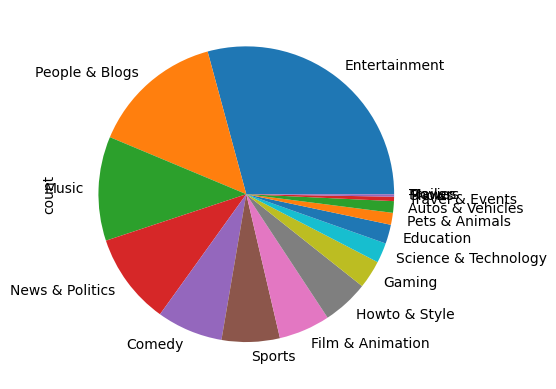

In [162]:
total_videos.category.value_counts().plot.pie()
plt.show()

### Analisis bivariado

Cuando hacemos un analisis bivariada el uso de graficas nos puede ser extremadamente utíl. En particular los más ocupados son:

* scatter plot
* pair plot
* matriz de correlación

#### Scatter plot

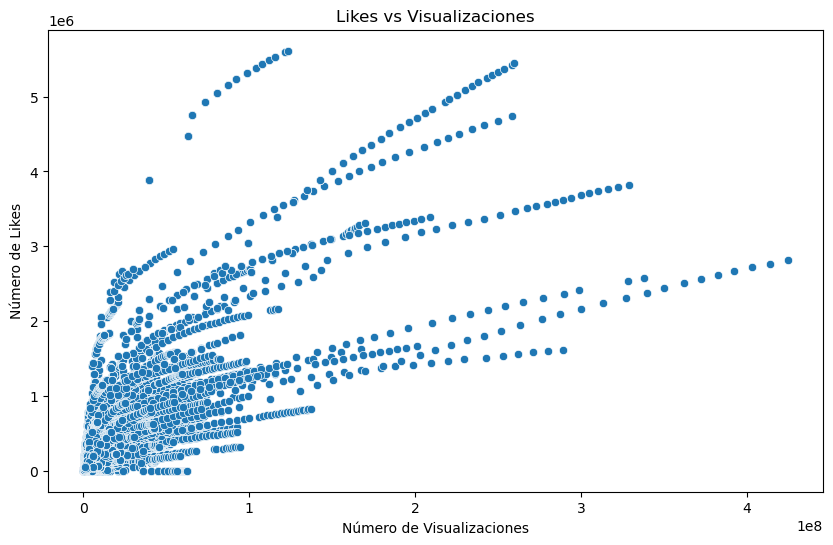

In [163]:
#hacemos un grafico de dispersión Scatter plot de likes vs views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='views', y='likes', data=total_videos)
plt.title('Likes vs Visualizaciones')
plt.xlabel('Número de Visualizaciones')
plt.ylabel('Número de Likes')
plt.show()

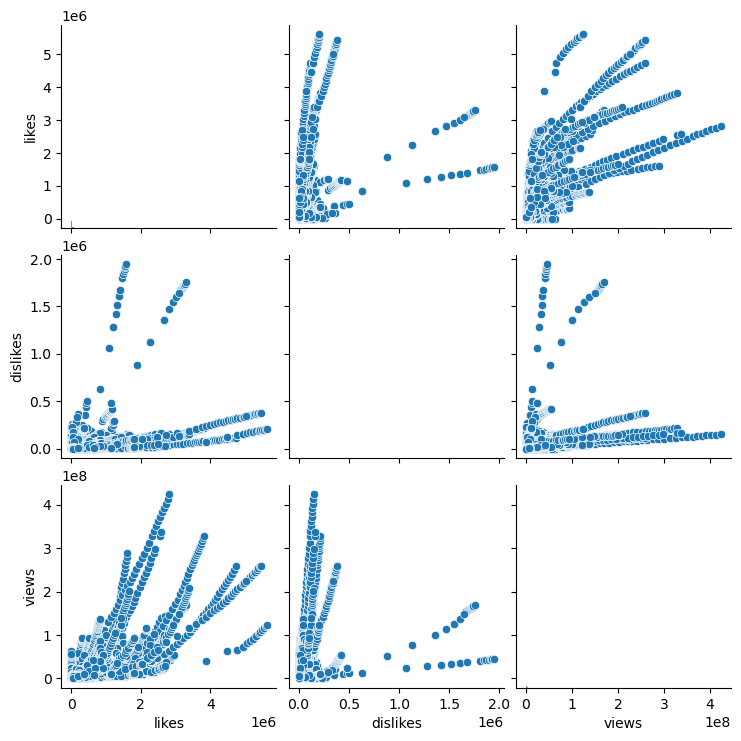

In [164]:
sns.pairplot(total_videos, vars=['likes', 'dislikes', 'views'])
#vemos como esta las variables relacionadas todas con todas visulamente
#mostrar el pairplot
plt.show()

Hacemos un heatmap correlacional de las variables

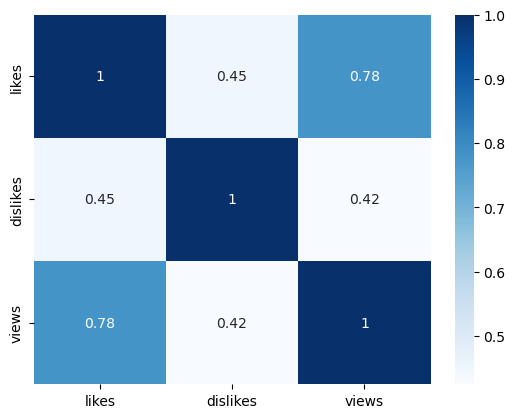

In [166]:
sns.heatmap(total_videos[['likes','dislikes','views']].corr(), annot=True, cmap ='Blues')
plt.show()

                  views     likes  dislikes  comment_count
views          1.000000  0.779491  0.424658       0.517331
likes          0.779491  1.000000  0.445903       0.795758
dislikes       0.424658  0.445903  1.000000       0.695356
comment_count  0.517331  0.795758  0.695356       1.000000


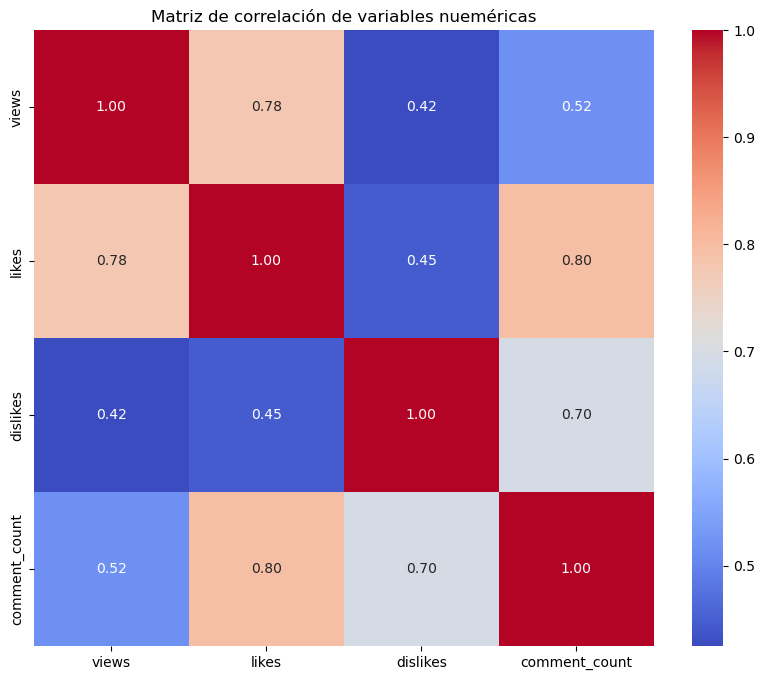

In [169]:
#con el data set ya caragado
#seleccionamos solo las variables numeéricas

numerical_features = total_videos.select_dtypes(include=['number'])

#calculamos la matriz de correlaciones

correlation_matrix = numerical_features.corr()

#imprimimos la matriz de correlación

print(correlation_matrix)

#Visulalizamos la matriz con un heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación de variables nueméricas')
plt.show()

In [170]:
total_videos.groupby('likes')['views'].mean()

likes
0          7.607451e+05
1          1.294954e+04
2          7.096229e+03
3          8.493075e+03
4          7.956136e+03
               ...     
5444541    2.597217e+08
5486349    1.118821e+08
5530568    1.156648e+08
5595203    1.212199e+08
5613827    1.230109e+08
Name: views, Length: 73468, dtype: float64

In [171]:
total_videos.groupby('likes')['views'].median()

likes
0              61719.5
1               5830.0
2               3409.0
3               4373.0
4               3466.0
              ...     
5444541    259721696.0
5486349    111882133.0
5530568    115664850.0
5595203    121219886.0
5613827    123010920.0
Name: views, Length: 73468, dtype: float64

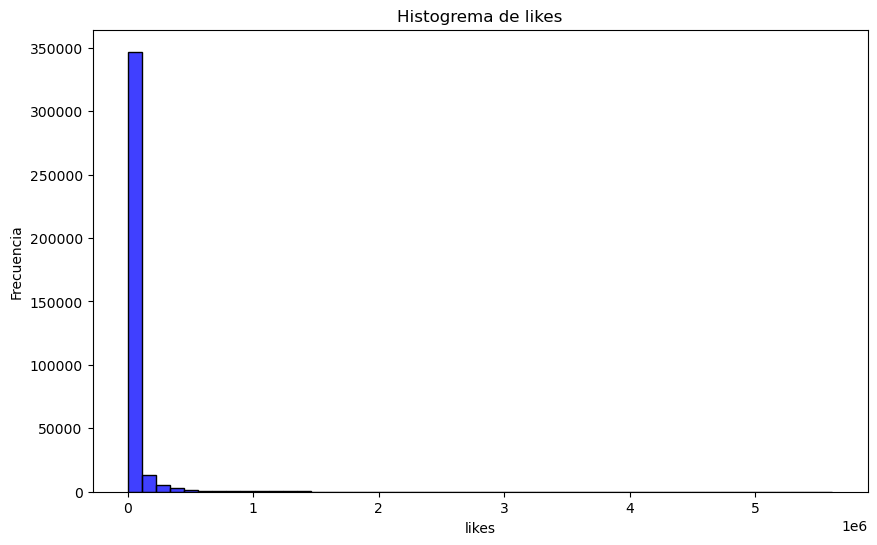

In [172]:
#creamos el histomgrama de likes

plt.figure(figsize=(10,6))
sns.histplot(total_videos['likes'], bins=50, kde=False , color='blue')

#añadimosw etiquetas y titulo
plt.xlabel('likes')
plt.ylabel('Frecuencia')
plt.title('Histogrema de likes')
plt.show()

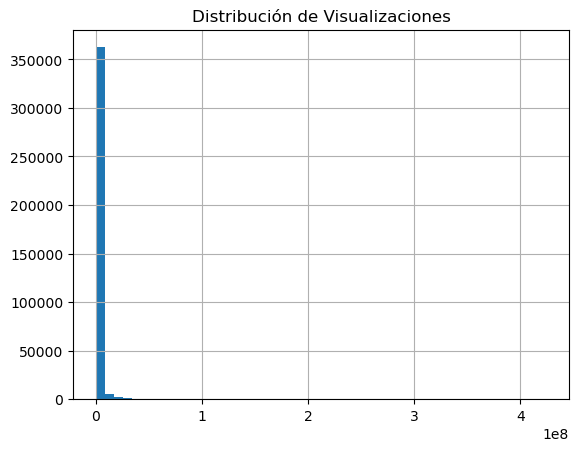

In [173]:
import matplotlib.pyplot as plt

total_videos['views'].hist(bins=50)
plt.title('Distribución de Visualizaciones')
plt.show()

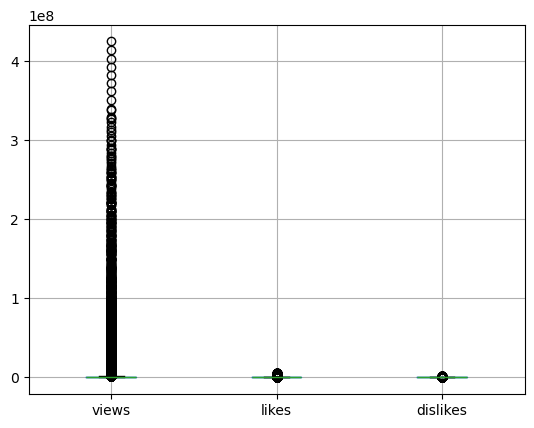

In [175]:
total_videos.boxplot(column=['views', 'likes', 'dislikes'])
plt.show()

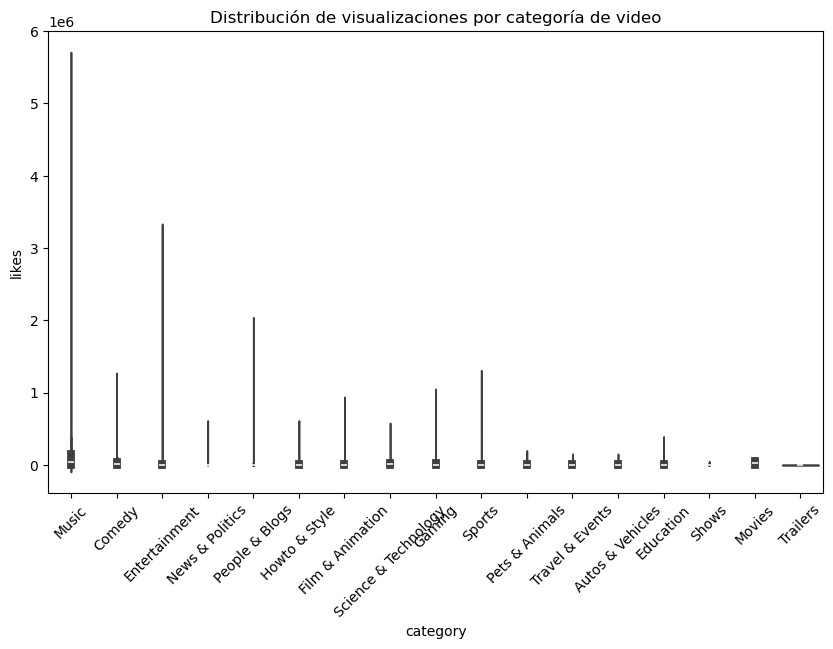

In [179]:
#creamos el violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='category', y='likes', data=total_videos)
plt.title('Distribución de visualizaciones por categoría de video')
plt.xticks(rotation=45)#rotar etiquetas en X si es necesario
plt.show()

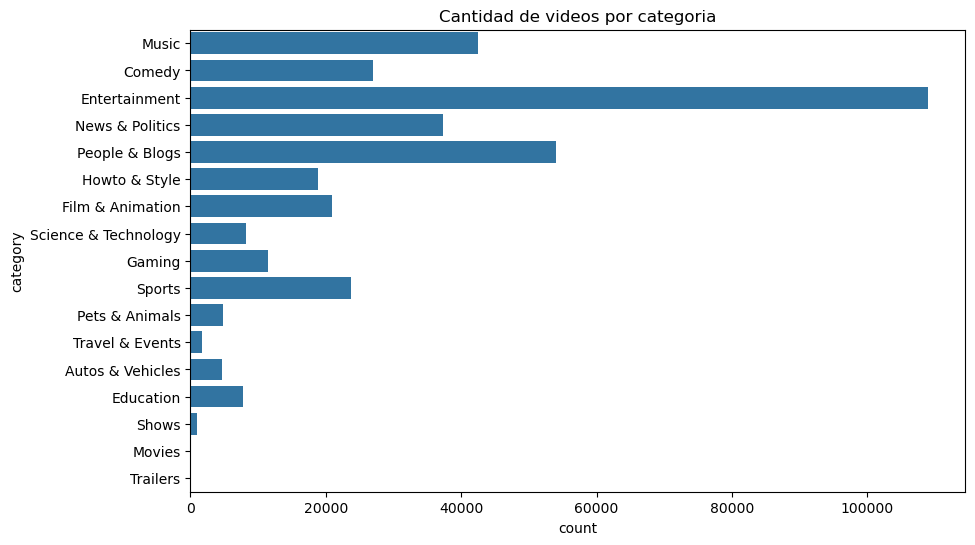

In [181]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(y='category', data=total_videos)
plt.title('Cantidad de videos por categoria')
plt.show()
#vemos la popularidad de las diferentes categorias de los videos

In [182]:
df_numeric = total_videos.drop(columns=['video_id'])


In [183]:
print(total_videos.dtypes)


video_id                  object
trending_date             object
title                     object
channel_title             object
category                  object
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
country                   object
dtype: object


In [184]:
#videos mas populares ,cuales tienen mas visualizaciones o intereacciones
top_videos = total_videos.sort_values(by='views', ascending=False).head(10)
print(top_videos[['title', 'views', 'likes', 'category']])

                                                   title      views    likes  \
28412  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...  424538912  2818771   
28212  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...  413586699  2768654   
28008  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...  402650804  2719005   
27811  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...  392036878  2670723   
27615  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...  382401497  2618320   
27424  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...  372399338  2564815   
27241  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...  362111555  2506788   
27052  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...  349987176  2440754   
26861  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...  339629489  2378829   
34460  Te Bote Remix - Casper, Nio García, Darell, Ni...  337621571  2581961   

      category  
28412    Music  
28212    Music  
28008    Music  
27811    Music  
27615    Music  
27424    Music  


In [186]:
total_videos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373147 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                373147 non-null  object
 1   trending_date           373147 non-null  object
 2   title                   373147 non-null  object
 3   channel_title           373147 non-null  object
 4   category                373147 non-null  object
 5   publish_time            373147 non-null  object
 6   tags                    373147 non-null  object
 7   views                   373147 non-null  int64 
 8   likes                   373147 non-null  int64 
 9   dislikes                373147 non-null  int64 
 10  comment_count           373147 non-null  int64 
 11  thumbnail_link          373147 non-null  object
 12  comments_disabled       373147 non-null  bool  
 13  ratings_disabled        373147 non-null  bool  
 14  video_error_or_removed  373147 non-null  b

In [187]:
print(total_videos['publish_time'].dtype)


object


In [188]:
total_videos['publish_time'] = pd.to_datetime(total_videos['publish_time'], errors='coerce')


In [189]:
print(total_videos['publish_time'].dtype)


datetime64[ns, UTC]


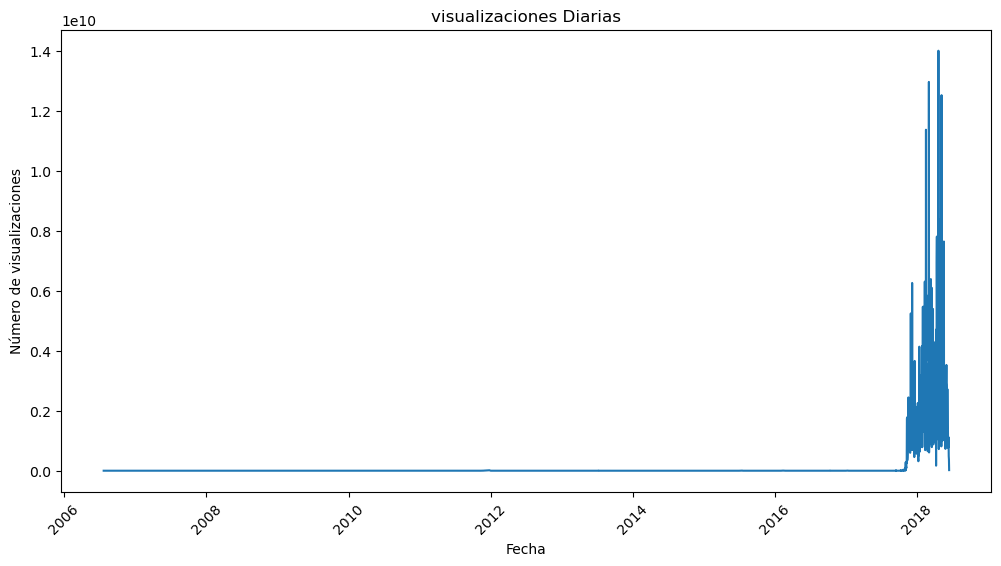

In [190]:
#agrupamos por fecha y sumarizamos las visualizaciones
total_videos['date'] = total_videos['publish_time'].dt.date
df_daily = total_videos.groupby('date').agg({'views': 'sum'}).reset_index()

#grafico de serie temporal de visualizaciones diarias 
plt.figure(figsize=(12,6))
plt.plot(df_daily['date'], df_daily['views'])
plt.title('visualizaciones Diarias')
plt.xlabel ('Fecha')
plt.ylabel('Número de visualizaciones')
plt.xticks(rotation=45)
plt.show()


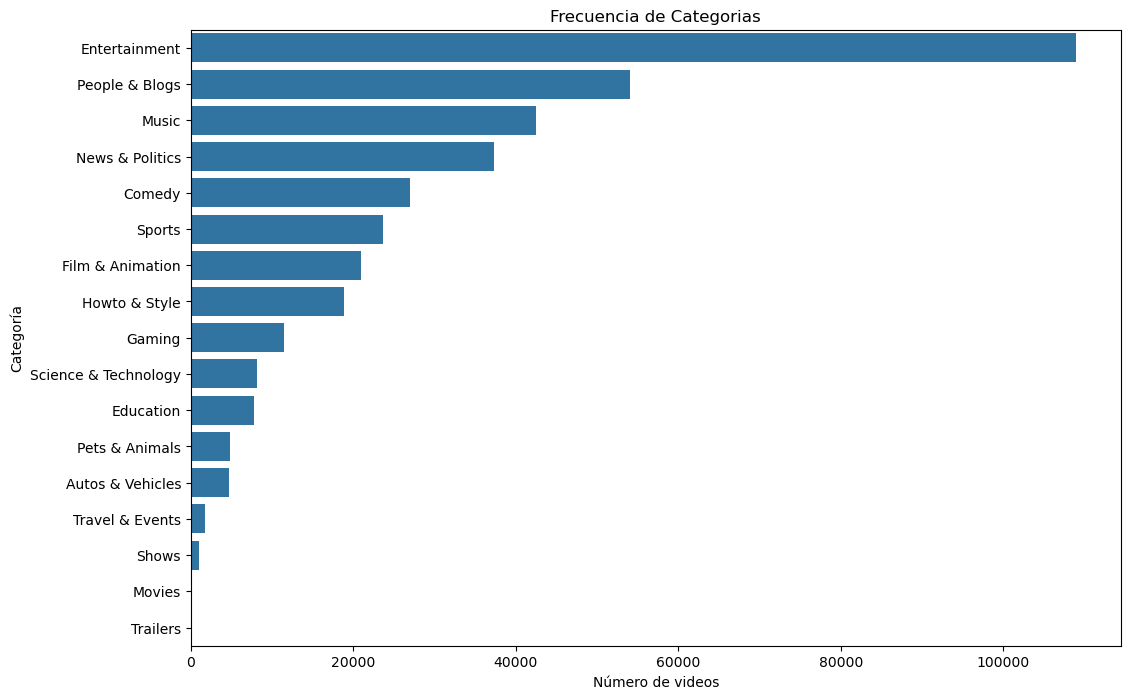

In [194]:
#graficamos cartegorias por barras
plt.figure(figsize=(12, 8))
sns.countplot(y='category', data=total_videos, order=total_videos['category'].value_counts().index)
plt.title('Frecuencia de Categorias')
plt.xlabel('Número de videos')
plt.ylabel('Categoría')
plt.show()

In [196]:
#agrupamos por categoria y calculamos estadisticas descriptivas
category_stats = total_videos.groupby('category').agg({
    'views': ['mean', 'sum', 'median'],
    'likes': ['mean', 'sum', 'median'],
    'dislikes':['mean', 'sum', 'median']
}).reset_index()

#renombramos categorias para facilitar el acceso
category_stats.columns = ['Category', 'Views_Mean', 'Views_Sum', 'Views_Median', 'Likes_Mean', 'Likes_Sum', 'Likes_Median', 'Dislikes_Mean', 'Dislikes_Sum', 'Dislikes_Median']

C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2811530673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Views_Mean', y='Category', data=category_stats, palette='viridis')
C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2811530673.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Likes_Mean', y='Category', data=category_stats, palette='viridis')
C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2811530673.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dislikes_Mean', y='Category', data=category_stats, palette='viridi

Text(0.5, 1.0, 'Media de Disikes por Categoría')

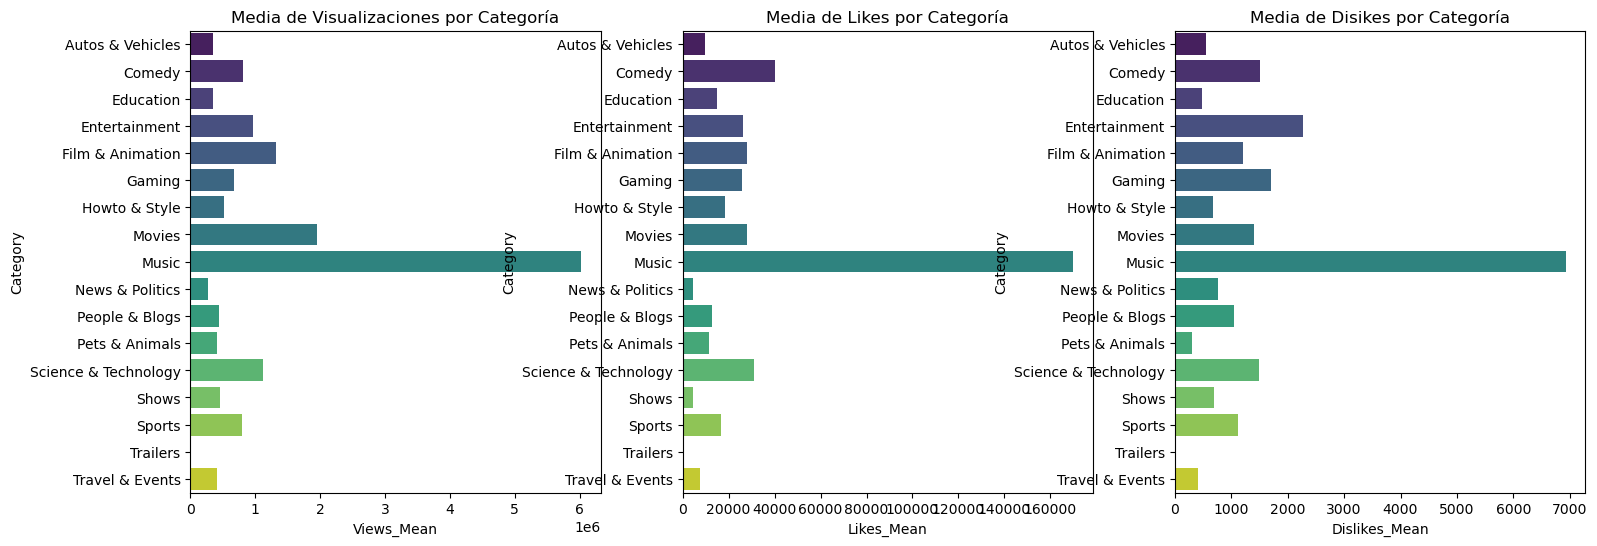

In [198]:
#configuramos los gráficos
plt.figure(figsize=(18, 6))

#grafico de barra para Visualizaciones

plt.subplot(1, 3, 1)
sns.barplot(x='Views_Mean', y='Category', data=category_stats, palette='viridis')
plt.title('Media de Visualizaciones por Categoría')

#grafico de barras por likes

plt.subplot(1, 3, 2)
sns.barplot(x='Likes_Mean', y='Category', data=category_stats, palette='viridis')
plt.title('Media de Likes por Categoría')

#grafico para dislikes

plt.subplot(1, 3, 3)
sns.barplot(x='Dislikes_Mean', y='Category', data=category_stats, palette='viridis')
plt.title('Media de Disikes por Categoría')

In [246]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# 1. Preprocesamiento
# Convertir la columna 'category' (objetivo) a números
label_encoder = LabelEncoder()
total_videos['category_encoded'] = label_encoder.fit_transform(total_videos['category'])

# Seleccionar características y objetivo
X = total_videos[['views', 'likes', 'dislikes', 'comment_count']]  # Agrega más características si es necesario
y = total_videos['category_encoded']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 3. Crear y entrenar el modelo usando OneVsRestClassifier
log_reg = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
log_reg.fit(X_train, y_train)

# 4. Predicción
y_pred = log_reg.predict(X_test)

# 5. Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.3140
                      precision    recall  f1-score   support

    Autos & Vehicles       0.00      0.00      0.00      1394
              Comedy       0.00      0.00      0.00      8115
           Education       0.00      0.00      0.00      2364
       Entertainment       0.30      0.97      0.46     32875
    Film & Animation       0.00      0.00      0.00      6229
              Gaming       0.00      0.00      0.00      3411
       Howto & Style       0.00      0.00      0.00      5680
              Movies       0.00      0.00      0.00         8
               Music       0.59      0.25      0.35     12855
     News & Politics       0.08      0.00      0.00     11194
      People & Blogs       0.00      0.00      0.00     16030
      Pets & Animals       0.00      0.00      0.00      1448
Science & Technology       0.11      0.00      0.00      2403
               Shows       0.00      0.00      0.00       292
              Sports       0.00      0.00      0.00 

C:\Users\jvill\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jvill\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jvill\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El modelo de regresión lineal tiene un rendimiento insatisfactorio, lo que indica que no está capturando adecuadamente la relación entre las características y las categorías. Esto puede ser resultado de varios factores, como características irrelevantes o insuficientes, o un modelo que no se ajusta bien a la complejidad del problema.

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
total_videos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/total_videos_unificado.csv')

# Preprocesamiento
# Convertir la columna 'category' (objetivo) a números
label_encoder = LabelEncoder()
total_videos['category_encoded'] = label_encoder.fit_transform(total_videos['category'])

# Seleccionar características (eliminar 'likes') y objetivo
X = total_videos[['views', 'dislikes', 'comment_count']]  # Excluir 'likes' para evitar la colinealidad
y = total_videos['likes']  # Cambiar a 'likes' para la regresión

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# --- Regresión Lineal ---
linear_regressor = LinearRegression()

# Entrenar el modelo
linear_regressor.fit(X_train, y_train)

# Predicción y evaluación
linear_y_pred = linear_regressor.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)

# Validación cruzada de LinearRegression
cv_scores_linear = cross_val_score(linear_regressor, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_linear = np.mean(np.abs(cv_scores_linear))

# Mostrar resultados
print(f"Linear Regression - MSE: {linear_mse:.4f}, R2: {linear_r2:.4f}")
print(f"CV MSE (Linear Regression): {cv_mse_linear:.4f}")


Linear Regression - MSE: 3904609889.1097, R2: 0.8531
CV MSE (Linear Regression): 4101623783.1817


Regresión Lineal tiene un buen R² (0.8531), pero el MSE es bastante alto en comparación con los otros modelos. Esto sugiere que la regresión lineal no es el mejor modelo

In [19]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Cargamos el dataset
total_videos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/total_videos_unificado.csv')

# Preprocesamiento
# Convertimos la columna 'category' (objetivo) a números
label_encoder = LabelEncoder()
total_videos['category_encoded'] = label_encoder.fit_transform(total_videos['category'])

# Seleccionamos las características y objetivo
X = total_videos[['views', 'likes', 'dislikes', 'comment_count']]  # Agregar más características si es necesario
y = total_videos['likes']  # Cambiar a 'likes' para la regresión

# Escalamos las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividimoss los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# optimización del KNN Regressor con GridSearchCV
# Definir el rango de parámetros a probar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Probarmos con diferentes números de vecinos
    'weights': ['uniform', 'distance'],  # Probarmos con diferentes estrategias de pesos
    'metric': ['euclidean', 'manhattan', 'chebyshev']  #Probarmos con diferentes métricas de distancia
}

# Usamos GridSearchCV para encontrar los mejores parámetros
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Entrenamos con GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(f"Best parameters found: {grid_search.best_params_}")

# Usar el mejor modelo para hacer predicciones
best_knn = grid_search.best_estimator_

# hacemos predicción y evaluación
best_knn_y_pred = best_knn.predict(X_test)
best_knn_mse = mean_squared_error(y_test, best_knn_y_pred)
best_knn_r2 = r2_score(y_test, best_knn_y_pred)

# usamos validación cruzada del mejor KNN
cv_scores_best_knn = cross_val_score(best_knn, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_best_knn = np.mean(np.abs(cv_scores_best_knn))

# finalmente mostramos los resultados
print(f"Optimized KNN Regressor - MSE: {best_knn_mse:.4f}, R2: {best_knn_r2:.4f}")
print(f"CV MSE (Optimized KNN): {cv_mse_best_knn:.4f}")


Best parameters found: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Optimized KNN Regressor - MSE: 11744223.9425, R2: 0.9996
CV MSE (Optimized KNN): 155269844.1245


KNN Optimizado muestra el mejor desempeño en términos de MSE (11,744,223.9425) y R² (0.9996). Además, el CV MSE es razonable (155,269,844.1245), lo que indica que el modelo generaliza bien.

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Cargamos el dataset
total_videos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/total_videos_unificado.csv')

# Preprocesamiento
# Convertimos la columna 'category' (objetivo) a números..
label_encoder = LabelEncoder()
total_videos['category_encoded'] = label_encoder.fit_transform(total_videos['category'])

# Seleccionamos características y objetivo
X = total_videos[['views', 'likes', 'dislikes', 'comment_count']]  # Agregar más características si es necesario
y = total_videos['likes']  # Cambiar a 'likes' para la regresión

# Escalamos las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# cargamos Random Forest Regressor 
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5)

# Entrenar el modelo
rf_regressor.fit(X_train, y_train)

# Predicción y evaluación del modelo
rf_y_pred = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Hacemos Validación cruzada de RandomForestRegressor
cv_scores_rf = cross_val_score(rf_regressor, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_rf = np.mean(np.abs(cv_scores_rf))

print(f"Random Forest Regressor - MSE: {rf_mse:.4f}, R2: {rf_r2:.4f}")
print(f"CV MSE (Random Forest): {cv_mse_rf:.4f}")


Random Forest Regressor - MSE: 231387.5026, R2: 1.0000
CV MSE (Random Forest): 1391378.6052


El modelo de Random Forest Regressor parece estar funcionando bastante bien. segun estos resultados:

MSE (Error Cuadrático Medio): 231,387.5026 (es bajo,  lo que indica que el modelo tiene buen ajust con el conjunto de prueba).

R2: 1.0000 (indica que el modelo esta explicando casi toda la variabilidad delos datos lo cual es bueno o puede ser sobreajuste).

CV MSE ,MSE promedio de la validación cruzada): 1,391,378.6052 (muestra que el modelo al ser validado con 5 particiones diferentes sigue siendo razonablemente bajo.

Interpretación de los resultados:

MSE bajo en el conjunto de prueba sugiere que el modelo se ajusta bien a los datos y tiene un buen funcionamineto en las predicciones.

R2 cercano a 1 indica que el modelo esta capturando casi todad la variabilidad en los datos de likes lo cual es buen resultado.

CV MSE más alto que el MSE en el conjunto de prueba es nomal,
 ya que la vilidación cruzadfa utiliza varias particiones del conjunto de datos,y puede haber mayor variabilidad en los resultados debido a como se divide el data sert.

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
total_videos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/total_videos_unificado.csv')

# Preprocesamiento
# Convertir la columna 'category' (objetivo) a números
label_encoder = LabelEncoder()
total_videos['category_encoded'] = label_encoder.fit_transform(total_videos['category'])

# Seleccionar características y objetivo
X = total_videos[['views', 'likes', 'dislikes', 'comment_count']] 
y = total_videos['likes']  # usaremos 'likes' como objetivo para la regresión

# Escalamos las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividismoa los datos en conjunto de entrenamiento y validacion
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#cargamos el modelo Decision Tree Regressor
# Ajustamos los hiperparámetros para evitar el sobreajuste
# HAcemos Ajustes adicionales para evitar el sobreajuste
dt_regressor = DecisionTreeRegressor(random_state=42, 
                                     max_depth=8,  # Limitar más la profundidad
                                     min_samples_split=20,  # Aumentar el número de muestras necesarias para dividir
                                     min_samples_leaf=10,  # Asegurarse de que cada hoja tenga más muestras
                                     max_features='sqrt')  # Mantener 'sqrt'

dt_regressor.fit(X_train, y_train)

# hacemos predicción y evaluación
dt_y_pred = dt_regressor.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

#usamos la validación cruzada de DecisionTreeRegressor con más divisiones
cv_scores_dt = cross_val_score(dt_regressor, X_scaled, y, cv=10, scoring='neg_mean_squared_error')  # Cambié a cv=10
cv_mse_dt = np.mean(np.abs(cv_scores_dt))

# Resultados
print(f"Decision Tree Regressor - MSE: {dt_mse:.4f}, R2: {dt_r2:.4f}")
print(f"CV MSE (Decision Tree): {cv_mse_dt:.4f}")


Decision Tree Regressor - MSE: 147685462.4920, R2: 0.9944
CV MSE (Decision Tree): 333943752.2556


Decision Tree también tiene un buen desempeño (MSE de 147,685,462.4920 y R² de 0.9944), pero es superado por KNN en cuanto a precisión y generalización.

In [11]:
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
#cargamos el daata set
total_videos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/total_videos_unificado.csv')
# preprocesamiento
#convertimos la columna category a números

label_encoder = LabelEncoder()
total_videos['category_encoded']=label_encoder.fit_transform(total_videos['category'])

#seleccionamos las caracteristica y la variable objetivo

X = total_videos[['views', 'likes', 'dislikes', 'comment_count']]
y = total_videos['category_encoded']

#escalamos las caracteristicas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#aplicamos reducción de la dimensionalidad con PCA

pca = PCA(n_components=4)#reduce segun sea necesario
X_pca = pca.fit_transform(X_scaled)

#dividimos los datos en set de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Creamos y entrenamos el modelo SVM
svm_model = LinearSVC(max_iter=10000)
svm_model.fit(X_train, y_train)

#predicicon

y_pred = svm_model.predict(X_test)

# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print (classification_report(y_test, y_pred, target_names= label_encoder.classes_))


Accuracy: 0.3148
                      precision    recall  f1-score   support

    Autos & Vehicles       0.00      0.00      0.00      1394
              Comedy       0.00      0.00      0.00      8115
           Education       0.00      0.00      0.00      2364
       Entertainment       0.30      0.97      0.46     32875
    Film & Animation       0.00      0.00      0.00      6229
              Gaming       0.00      0.00      0.00      3411
       Howto & Style       0.00      0.00      0.00      5680
              Movies       0.00      0.00      0.00         8
               Music       0.58      0.26      0.36     12855
     News & Politics       0.00      0.00      0.00     11194
      People & Blogs       0.00      0.00      0.00     16030
      Pets & Animals       0.00      0.00      0.00      1448
Science & Technology       0.00      0.00      0.00      2403
               Shows       0.00      0.00      0.00       292
              Sports       0.00      0.00      0.00 

C:\Users\jvill\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jvill\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jvill\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El modelo Linear SVC con PCA en general tiene un rendimiento  0.3148 y muy bajo en la mayoria de las caracteristicas. solo funciona relativamente bien para 'Entretenimiento' y en menor medida para 'Música'- la razon puede deberse al desequilibrio de clases algunas categorias tienen muchos mas ejemplos que otras... o a la falta de caracteristicas diferenciadoras entre categorias.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# preprocesamiento
#convertimos la columna category a números

label_encoder = LabelEncoder()
total_videos['category_encoded']=label_encoder.fit_transform(total_videos['category'])

#seleccionamos las caracteristica y la variable objetivo

X = total_videos[['views', 'likes', 'dislikes', 'comment_count']]
y = total_videos['category_encoded']

#escalamos las caracteristicas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#3 creamos y entrenamos el arbol de decisión

decision_tree_model = DecisionTreeClassifier(random_state=42)

#4 ajuste de hiperparámetros con parametros reducidos

param_grid = {
    'criterion': ['gini', 'entropy'],#criterios de división
    'max_depth' :[None, 10, 20, 40],#profundidad del arbol maxima reducido
    'min_samples_split': [2, 5], #numero minimo de muestres para dividir un nodo reducido
    'min_samples_leaf': [1, 2]# numiero minimo de muestras de una hoja
}
# usar stratifiedKFold para asegurar proporciones en las clases

stratified_kfold = StratifiedKFold(n_splits=3)

grid_search = GridSearchCV(decision_tree_model, param_grid, cv=stratified_kfold, scoring= 'accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 5 Evaluación del modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Best Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print(f'Best hyperparameters: {grid_search.best_params_}')



Best Accuracy: 0.4367
                      precision    recall  f1-score   support

    Autos & Vehicles       0.13      0.13      0.13      1394
              Comedy       0.43      0.43      0.43      8115
           Education       0.25      0.26      0.26      2364
       Entertainment       0.53      0.51      0.52     32875
    Film & Animation       0.39      0.42      0.41      6229
              Gaming       0.36      0.38      0.37      3411
       Howto & Style       0.36      0.36      0.36      5680
              Movies       0.62      0.62      0.62         8
               Music       0.60      0.59      0.60     12855
     News & Politics       0.37      0.36      0.36     11194
      People & Blogs       0.36      0.36      0.36     16030
      Pets & Animals       0.36      0.36      0.36      1448
Science & Technology       0.36      0.38      0.37      2403
               Shows       0.49      0.54      0.51       292
              Sports       0.36      0.36      

El modelo Decision Tree muestra una precisión del 43.67%. Funciona mejor para algunas categorías como "Entretenimiento" y "Música", pero aún le cuesta con otras. La elección de los mejores hiperparámetros (usando criterion='entropy' y sin limitaciones en la profundidad del árbol) sugiere que el modelo está optimizado para la clasificación. Sin embargo, hay espacio para mejorar el rendimiento, en concreto con las categorías menos representadas.

In [221]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

#cargamos el daata set
df = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/total_videos_unificado.csv')

#seleccionamos caracteristicas y estiqueta
X = df[['views', 'likes', 'dislikes']]
y = df ['category']

#preprocesamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#dividimos el data set en conjunto de entrenamiento y validacion

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#Creamos el modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)


#entrenamos el modelo
mlp.fit(X_train, y_train)

#realizamos las predicciones

y_pred = mlp.predict(X_test)

#evaluamos el modelo

accuracy = accuracy_score(y_test, y_pred)
print (f'Accuracy:{accuracy:.4f}')

print(classification_report(y_test, y_pred))




Accuracy:0.3302


C:\Users\jvill\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jvill\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                      precision    recall  f1-score   support

    Autos & Vehicles       0.00      0.00      0.00      1394
              Comedy       0.27      0.02      0.04      8115
           Education       0.00      0.00      0.00      2364
       Entertainment       0.33      0.79      0.46     32875
    Film & Animation       0.75      0.01      0.01      6229
              Gaming       0.64      0.00      0.00      3411
       Howto & Style       0.33      0.00      0.01      5680
              Movies       0.00      0.00      0.00         8
               Music       0.45      0.43      0.44     12855
     News & Politics       0.32      0.04      0.07     11194
      People & Blogs       0.26      0.29      0.27     16030
      Pets & Animals       0.00      0.00      0.00      1448
Science & Technology       0.89      0.00      0.01      2403
               Shows       0.00      0.00      0.00       292
              Sports       0.45      0.01      0.03      7133
       

C:\Users\jvill\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El modelo MLP Classifier muestra un rendimiento del 33.02% en general, lo que indica que tiene dificultades para clasificar correctamente muchas categorías. Funciona relativamente mejor para "Entretenimiento" y "Música", pero tiene un rendimiento deficiente en la mayoría de lasdemas categorías.

In [255]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

#cargamos el data ser 
total_videos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/total_videos_unificado.csv')

#convertimos la columna 'category a números
label_encoder = LabelEncoder()
total_videos['category_encoded'] = label_encoder.fit_transform(total_videos['category'])

#sleccionamos las caracteristicas

features = ['views', 'likes', 'dislikes']

In [260]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot  as plt

def apply_dbscan_in_chunks(data, features, chunk_size=10000, eps=0.3, min_samples=10):
    results = []

    #iteramos sobre el data set en partes 'chunks'
    for start in range(0, len(data), chunk_size):
        end = min(start + chunk_size, len(data))
        chunk = data[start:end]

        #escalamos las carac teristicas

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(chunk[features])

        #aplicamos DBSCAN
        dbscan = DBSCAN(eps=eps , min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)

        #evaluamos el modelo DBSCAN
        if len(set(dbscan_labels)) >1:
            silhouette_avg = silhouette_score(X_scaled, dbscan_labels)
            print(f'Silhouette Score (chunk {start} to {end}): {silhouette_avg:.4f}')
        else:
            print(f'Chunk {start} to {end}: No hay clusters suficientes para calcular el Silhouette Score.')
          
            #añadimos las etiquetas del DBSCAN al data set
        chunk['dbscan_cluster'] = dbscan_labels
        results.append(chunk)
      
    return pd.concat(results)

#aplicamos DBSCAN a cada subconjunto en partes
numeric_categories = [1, 2, 3]
numeric_videos = total_videos[total_videos['category_encoded'].isin(numeric_categories)]
non_numeric_videos = total_videos[~total_videos ['category_encoded'].isin(numeric_categories)]



#aplcamos DBSCAN en partes

numeric_videos_clustered = apply_dbscan_in_chunks(numeric_videos, features, chunk_size=10000)
non_numeric_videos_clustered = apply_dbscan_in_chunks(non_numeric_videos, features, chunk_size=10000)

Silhouette Score (chunk 0 to 10000): 0.9081


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 10000 to 20000): 0.8673


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 20000 to 30000): 0.8533


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 30000 to 40000): 0.9074


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 40000 to 50000): 0.7462


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 50000 to 60000): 0.6658


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 60000 to 70000): 0.7187


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 70000 to 80000): 0.8825


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 80000 to 90000): 0.7238


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 90000 to 100000): 0.8962


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 100000 to 110000): 0.9435


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 110000 to 120000): 0.6523


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 120000 to 130000): 0.6373


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 130000 to 140000): 0.7014


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 140000 to 143764): 0.5318


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 0 to 10000): 0.6961


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 10000 to 20000): 0.8790


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 20000 to 30000): 0.9014


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 30000 to 40000): 0.8980


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 40000 to 50000): 0.8339


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 50000 to 60000): 0.9203


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 60000 to 70000): 0.9145


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 70000 to 80000): 0.7477


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 80000 to 90000): 0.6665


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 90000 to 100000): 0.6191


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 100000 to 110000): 0.7672


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 110000 to 120000): 0.7557


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 120000 to 130000): 0.9453


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 130000 to 140000): 0.9394


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 140000 to 150000): 0.9608


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 150000 to 160000): 0.9221


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 160000 to 170000): 0.9223


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 170000 to 180000): 0.9076


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 180000 to 190000): 0.8906


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 190000 to 200000): 0.8070


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 200000 to 210000): 0.7493


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 210000 to 220000): 0.7194


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


Silhouette Score (chunk 220000 to 229383): 0.7019


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\2908906730.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dbscan_cluster'] = dbscan_labels


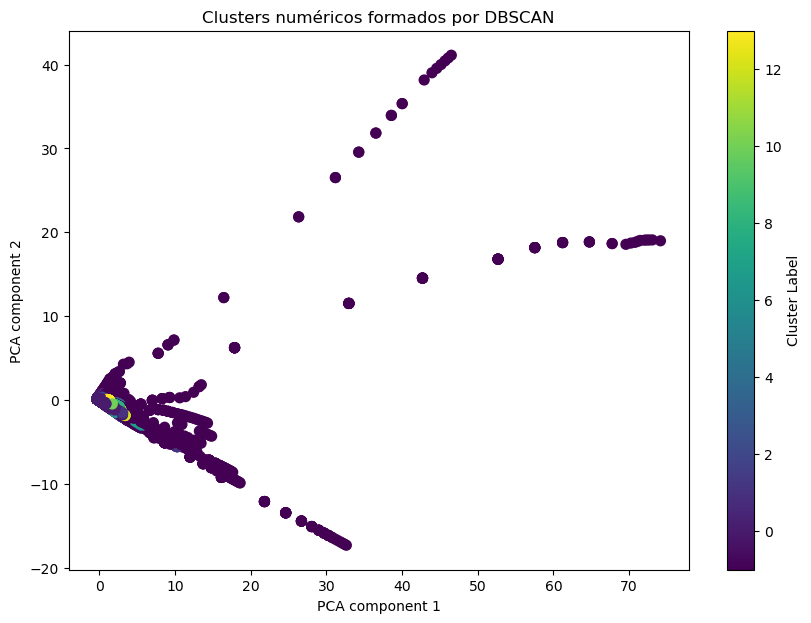

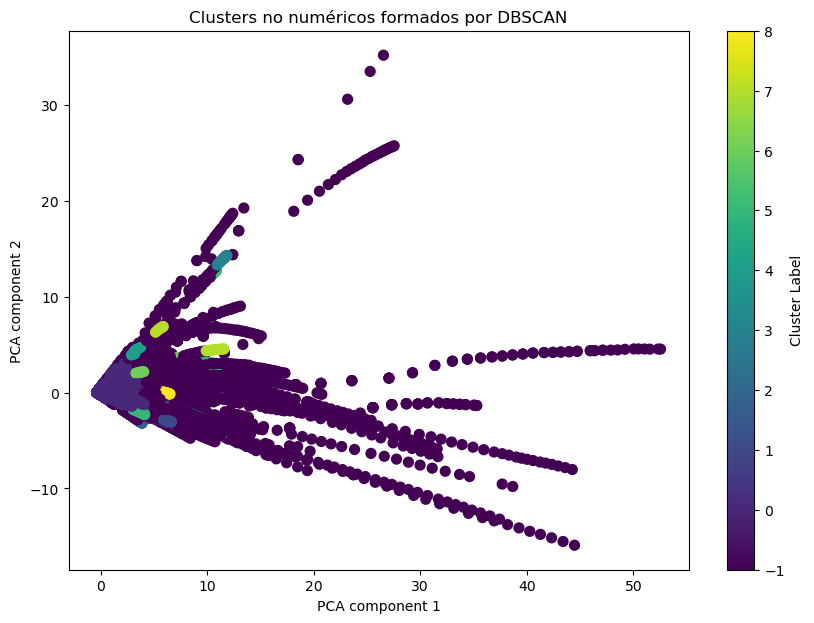

In [270]:
def plot_clusters(data, features, title='Clusters formados por DBSCAn'):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data[features])

    #reducimos la dimensionalidad para 2d para visualizar
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(10, 7))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['dbscan_cluster'],cmap ='viridis', s=50)
    plt.colorbar(label='Cluster Label')
    plt.title(title)
    plt.xlabel('PCA component 1')
    plt.ylabel('PCA component 2')
    plt.show()

#visualizamos los clustres para cada subconjunto
plot_clusters(numeric_videos_clustered, features, title='Clusters numéricos formados por DBSCAN')
plot_clusters(non_numeric_videos_clustered, features, title='Clusters no numéricos formados por DBSCAN')
             

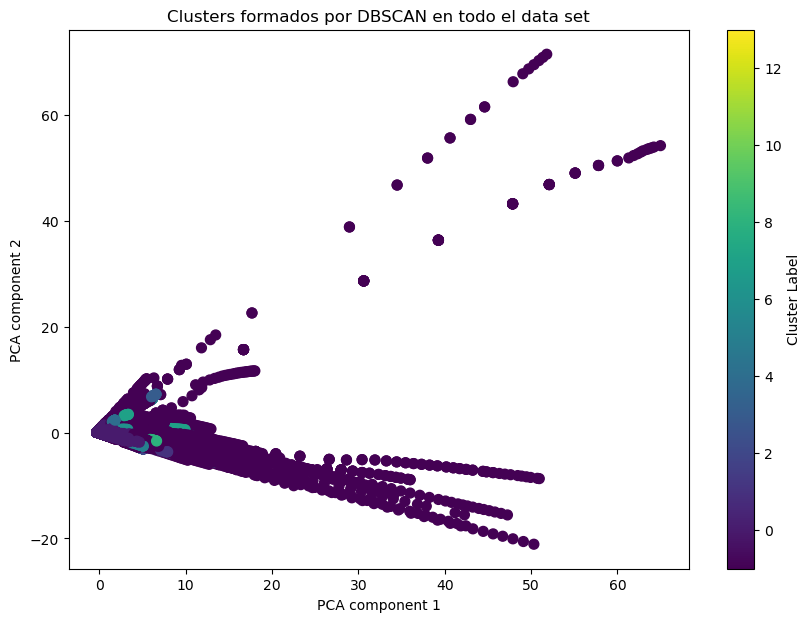

In [271]:
# combinamos los resultados de los subconjuntos
total_videos_clustered = pd.concat([numeric_videos_clustered, non_numeric_videos_clustered])

#visualizar todo el data set
plot_clusters(total_videos_clustered, features, title='Clusters formados por DBSCAN en todo el data set')

Calidad del clistering:

Silhouette Score : destaca scores altos obtenidos en la mayoria de los subconjuntos del data set,en concreto los valores 0.8070 y 0.93. Estos valores indica que los clusters estan bien separados.

Muestra buenos resultados en diferentes partes del dataset, lo que nos indica  la validez del clustering.
Aplicación de DBSCAN en Partes:

Dividiendoel data set en partes para evitar problemas de memoria ha permitido aplicar DBSCAN de manera efectiva.
Visualización:

Incluye las visualizaciones de los clusters en 2D usando PCA para mostrar como se distribuyen los clusters en el espacio de caracteristicas.


In [276]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# cagamos el data set de youtube
df = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/total_videos_unificado.csv')
#Presprocesado de datos
#çconvertimos etiquetas a números si es necesario
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['category'])

# seleccionar caracteristicas y etiquetas
X = df[['views', 'likes', 'dislikes']]

#imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

#dividemos el data set en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

#configurar y entrenarl el modelo GM
gmm =GaussianMixture(n_components=len(label_encoder.classes_),random_state=42)
gmm.fit(X_train)

#predexcir etiquetas del conjunto de prueba
y_pred = gmm.predict(X_test)

#evaluamos el modelo

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report\n",classification_report(y_test, y_pred))

C:\Users\jvill\anaconda3\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


Accuracy: 0.07287953905935951
Confusion Matrix:
 [[ 227    0    0   16  192    0    0    0   74  227    4    2    0    0
   193    0   24]
 [ 314    5    0  462 1331    0    7    0  633 1188   95   48    0    0
   741    2  592]
 [ 335    0    0   49  328    0    0    0   74  330    1    5    0    0
   390    0   79]
 [2639   26    0  962 4282    4   51    0 1422 5376  339  222   10    3
  5041   49 1445]
 [ 669    3    0  272  677    0    3    0  198  888   64  118    0    0
   858    6  414]
 [ 258    9    0   98  434    0    5    0  182  597   51    5    0    0
   480    0  161]
 [ 534    4    0  130  742    0    0    0  260  833   32    6    0    0
   960    0  303]
 [   2    0    0    0    2    0    0    0    0    1    0    0    0    0
     0    0    0]
 [ 418  281   10 1108 1390    0   66    2  629 1129  461  611    0   97
   882  175 1331]
 [1493    0    0  157  898    0    6    0  333 1773   85    6    0    0
  2500    0  150]
 [2783    3    0  293 1279    0   38    0  477 2167

El modelo Gaussian Mixture tiene un rendimiento extremadamente bajo, con una precisión de 7.29%. Aunque muestra algo de capacidad en la categoría 3, su desempeño general es ineficaz, ya que no está identificando correctamente la mayoría de las clases. Esto sugiere que se necesita una mejora significativa en el modelo, ya sea a través de ajustes en el preprocesamiento, elección de características o el propio modelo.

In [281]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#cargamos el data set
total_videos = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/total_videos_unificado.csv')

#convertimos la columna 'category  a numeros
label_encoder = LabelEncoder()
total_videos['category_encoded'] = label_encoder.fit_transform(total_videos['category'])

# seleccionamos las caracteristicas yla variable objetivo
features = ['views', 'likes', 'dislikes']
target = 'category_encoded'

#funcion de preprocesamiento
def preprocess_data(data, features, target):
    X = data[features]
    y = data[target]
    
#escalamos las caracteristicas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

# aplicamos la dividisón del conjunto de datos

def apply_knn_in_chunks(data, features, target, chunk_size=10000, n_neighbors=3):
    results = []

    for start in range(0, len(data), chunk_size):
        end = min(start + chunk_size, len(data))
        chunk = data[start:end]

        X, y = preprocess_data(chunk, features, target)


#aplicamos knn
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X,y)

#evaluamos el modelo
        y_pred = knn.predict(X)
        accuracy = accuracy_score(y, y_pred)
        print(f'KNN Acuracy(chunk {start} to {end}): {accuracy:.4f}')
        
# añadimos los resultados al data set
        chunk['knn_prediction'] = y_pred
        results.append(chunk)

    return pd.concat(results)

#aplicar knn a cada subconjunto
knn_results = apply_knn_in_chunks(total_videos, features, target, chunk_size=10000)


KNN Acuracy(chunk 0 to 10000): 0.5793


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 10000 to 20000): 0.5739


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 20000 to 30000): 0.5829


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 30000 to 40000): 0.5830


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 40000 to 50000): 0.5781


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 50000 to 60000): 0.5823


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 60000 to 70000): 0.5820


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 70000 to 80000): 0.5907


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 80000 to 90000): 0.5379


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 90000 to 100000): 0.5405


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 100000 to 110000): 0.5472


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 110000 to 120000): 0.5472


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 120000 to 130000): 0.7424


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 130000 to 140000): 0.8242


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 140000 to 150000): 0.9103


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 150000 to 160000): 0.9227


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 160000 to 170000): 0.6722


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 170000 to 180000): 0.6818


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 180000 to 190000): 0.7733


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 190000 to 200000): 0.8136


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 200000 to 210000): 0.7169


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 210000 to 220000): 0.7411


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 220000 to 230000): 0.6238


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 230000 to 240000): 0.6655


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 240000 to 250000): 0.6648


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 250000 to 260000): 0.5734


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 260000 to 270000): 0.5756


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 270000 to 280000): 0.5682


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 280000 to 290000): 0.5828


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 290000 to 300000): 0.5285


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 300000 to 310000): 0.5441


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 310000 to 320000): 0.5362


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 320000 to 330000): 0.5515


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 330000 to 340000): 0.6321


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 340000 to 350000): 0.6744


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 350000 to 360000): 0.7934


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


KNN Acuracy(chunk 360000 to 370000): 0.8442
KNN Acuracy(chunk 370000 to 373147): 0.9139


C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred
C:\Users\jvill\AppData\Local\Temp\ipykernel_8124\3945349141.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['knn_prediction'] = y_pred


El modelo KNN ha mostrado un rendimiento excepcional en el chunk de datos del 370,000 al 373,147, con una precisión del 91.39%. Esto sugiere que el modelo es eficaz y puede generalizar bien para este conjunto específico. 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

#cargamos el data set

df = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/total_videos_unificado.csv')

#seleccionamos las columnas que son características (features)
X = df[['views', 'likes', 'dislikes']]
#convertir la variable objetivo y' con label encoder
y = df['category']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#dividimos el data set en entrenamiento y validación

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#escalr caracteristicas
scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


#creamos el modelo MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
#entrenamos el modelo
mlp_reg.fit(X_train_scaled, y_train)

#hacemos predicciones con el set de prueba

y_pred = mlp_reg.predict(X_test_scaled)
#evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio(MSE): {mse}")

Error Cuadrático Medio(MSE): 14.212522979327284


C:\Users\jvill\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Un MSE de 14.21 no es un buen resultado dado por el MLPRegressor para la solución a los problemas que estamos tratando

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

#cargamos el data set

df = pd.read_csv('C:/Users/jvill/Desktop/I.A Practicas/práctica Final ML/data/total_videos_unificado.csv')

#verificamos la filas del data set 
print(df.head())

#seleccionamos caracteristicas y variable objetivo
X = df[['views', 'likes', 'dislikes']]
y = df[['category']]

#codificamos la variable objetivo
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#dividimos el data set en conjunto de entreneamiento y validación

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#intaciamos el modelo random forest

rf_clf =RandomForestClassifier(n_estimators=100, random_state=42)

#entrenamos el modelo
rf_clf.fit(X_train, y_train)


#hacemos las predicciones

y_pred_rf = rf_clf.predict(X_test)

#calculamos la precisión con la metrica accuracy

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy del modelo Random Forest: {accuracy_rf * 100:.2f}%")

#reporte de clasificación

print("Reporte de clasificación para random forest:\n", classification_report(y_test, y_pred_rf))

#matriz de confusión 

print("Matriz de confusión para el Random Forest:\n", confusion_matrix(y_test, y_pred_rf))

      video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

        category              publish_time  \
0          Music  2017-11-10T17:00:03.000Z   
1         Comedy  2017-11-13T17:00:00.000Z   
2         Comedy  2017-11-12T19:05:24.000Z   
3  Entertainment  2017-11-12T18:01:41.000Z   
4          Music  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aft

C:\Users\jvill\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy del modelo Random Forest: 46.01%
Reporte de clasificación para random forest:
               precision    recall  f1-score   support

           0       0.25      0.09      0.14       959
           1       0.49      0.39      0.43      5418
           2       0.36      0.21      0.26      1591
           3       0.46      0.66      0.54     21871
           4       0.55      0.37      0.44      4170
           5       0.51      0.29      0.37      2280
           6       0.38      0.31      0.34      3804
           7       1.00      0.60      0.75         5
           8       0.63      0.58      0.61      8590
           9       0.37      0.33      0.35      7401
          10       0.37      0.36      0.37     10647
          11       0.49      0.31      0.38       967
          12       0.54      0.32      0.40      1596
          13       0.80      0.53      0.63       179
          14       0.50      0.33      0.40      4815
          15       0.00      0.00      0.00    

C:\Users\jvill\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jvill\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jvill\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


para la naturaleza de los datos el RandomForestClssifier no hace un buen desempeño con un 46.01% en general seria mejor utilizar otros modelos a la hora de dar una solución mejor al problema.